In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)
yt = pd.read_csv('challenge_youtube_toxic.csv', encoding = 'latin1', engine = 'python', sep=';')

In [3]:
yt.describe()

,nbrMot,nbrMotInsulte,nbrMotAllong,nbrMotMAJ,nbrExclMark,nbrQuestMark,nbrMotMoyenne,nbrMotInsulteMoyenne,nbrMotAllongMoyenne,nbrMotMAJMoyenne,nbrExclMarkMoyenne,nbrQuestMarkMoyenne,thread_count,comment_count,message_count,discussion_count,distinct_authors_count,authors_3channels_count,liked_authors_count,subscriberCount,viewCount
count,46102.000000,46102.000000,46102.000000,46102.000000,46102.000000,46102.000000,46102.000000,46102.000000,46102.000000,46102.000000,46102.000000,46102.000000,46102.000000,46102.000000,46102.000000,46102.000000,46102.000000,46102.000000,46102.000000,46102.000000,4.610200e+04
mean,1435.853564,9.418225,3.974665,21.922823,21.823066,13.591276,25.264768,0.189175,0.080849,0.583485,0.633837,0.276134,22.219145,25.700816,47.919960,5.040085,28.726021,14.502646,10.974036,172108.752744,9.255061e+07
std,7670.789422,61.616732,21.367879,130.038591,120.607203,68.803038,31.979351,0.444356,0.305948,3.114312,1.600474,0.950349,117.441322,130.742237,234.791106,19.578795,140.334032,56.251117,50.607716,119508.318824,6.778302e+07
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,3.109100e+04
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.769231,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,87793.000000,4.635634e+07
50%,72.000000,0.000000,0.000000,0.000000,1.000000,1.000000,18.630032,0.000000,0.000000,0.000000,0.250000,0.040161,3.000000,0.000000,4.000000,0.000000,3.000000,2.000000,1.000000,180173.000000,6.388093e+07
75%,398.000000,3.000000,1.000000,6.000000,9.000000,4.000000,31.000000,0.222222,0.068821,0.400000,0.750000,0.333333,9.000000,5.000000,16.000000,2.000000,11.000000,7.000000,4.000000,217835.000000,1.321257e+08
max,662808.000000,7227.000000,1416.000000,14270.000000,11093.000000,5520.000000,1349.500000,14.000000,28.000000,162.000000,104.000000,120.750000,8734.000000,11195.000000,19336.000000,1235.000000,9837.000000,3762.000000,3732.000000,568615.000000,2.414350e+08


In [34]:
test = yt
len(test.dropna())

46102

La donnée est de très bonne qualité, il n'y a pas de valeur NULL dans ce dataset.

In [4]:
print('Number of unique channel = ', len(yt.channel_id.unique()))

Number of unique channel =  58


In [5]:
for name in yt.channel_name.unique() :
    print(name, 'has', len(yt[yt['channel_name'] == name].video_id.unique()), 'different videos in their channel.')

LeHuffPost has 5141 different videos in their channel.
CNEWS has 8950 different videos in their channel.
Telegramme has 216 different videos in their channel.
Les Echos has 841 different videos in their channel.
Sud Ouest has 601 different videos in their channel.
Corse-Matin Presse has 107 different videos in their channel.
Gala has 170 different videos in their channel.
franceinfo has 3671 different videos in their channel.
Obs has 1854 different videos in their channel.
Le Figaro has 4724 different videos in their channel.
Lequipe has 4855 different videos in their channel.
StreetPress has 308 different videos in their channel.
La Provence has 674 different videos in their channel.
Ouest-France has 994 different videos in their channel.
La Voix du Nord has 34 different videos in their channel.
Le Monde has 1385 different videos in their channel.
Le Parisien has 1834 different videos in their channel.
Paris Match has 1146 different videos in their channel.
Lundi Matin has 89 differen

In [35]:
# idem mais avec un groupby

print('Number of videos for each channel', '\n', yt.groupby('channel_name').video_id.count())

Number of videos for each channel 
 channel_name
20MinutesFR                               588
Acrimed                                    55
AgoraVoxFrance                            179
Alternatives Economiques Officiel          31
AtlanticoFr                                 1
CNEWS                                    8950
Causeur                                    86
Contre Info                                23
Corse Net Infos                           111
Corse-Matin Presse                        107
Courrier international                     81
DNA - DerniÌå_res Nouvelles d'Alsace      10
Dauphine_libere                           219
Fakirpresse                                77
Famille_chretienne                        132
Fdesouche                                   7
France Net Infos journal                   27
France-Soir                               432
Gala                                      170
Humanite                                  799
L'Express                      

In [37]:
# on trouve la chaîne YouTube avec le plus d'abonnés.

channel_max = ''
max_val = 0
for name in yt.channel_name.unique() :
    if yt[yt['channel_name'] == name].subscriberCount.unique()[0] > max_val :
        max_val = yt[yt['channel_name'] == name].subscriberCount.unique()[0]
        channel_max = name
    else :
        max_val = max_val
# print(channel_max, max_val)
print('The Channel which has the maximum number of subscribers is', channel_max, 'and has', max_val, 'subscribers.')

The Channel which has the maximum number of subscribers is Le Monde and has 568615 subscribers.


In [9]:
# moyenne du nombre moyen de mots utilisés en commentaires pour chaque chaîne.

print('La moyenne de nombre de mot moyen par chaîne est de', '\n', yt.groupby('channel_name').nbrMotMoyenne.mean())

La moyenne de nombre de mot moyen par chaîne est de 
 channel_name
20MinutesFR                              20.373181
Acrimed                                  24.060274
AgoraVoxFrance                           18.133663
Alternatives Economiques Officiel        33.522601
AtlanticoFr                              34.339620
CNEWS                                    27.202790
Causeur                                  44.599867
Contre Info                              28.155413
Corse Net Infos                          23.108038
Corse-Matin Presse                       15.814572
Courrier international                   29.165328
DNA - DerniÌå_res Nouvelles d'Alsace     8.532500
Dauphine_libere                          16.548298
Fakirpresse                              31.724390
Famille_chretienne                       35.455191
Fdesouche                                30.068801
France Net Infos journal                 11.151235
France-Soir                              21.996945
Gala           

In [10]:
# création d'un DataFrame contenant la moyenne du nombre moyen de mots, de mots insultes,
# de mots majuscules et de mots allongés.

X = pd.DataFrame(yt.groupby('channel_name').nbrMotMoyenne.mean())
Y = pd.DataFrame(yt.groupby('channel_name').nbrMotInsulteMoyenne.mean())
Z = pd.DataFrame(yt.groupby('channel_name').nbrMotAllongMoyenne.mean())
A = pd.DataFrame(yt.groupby('channel_name').nbrMotMAJMoyenne.mean())
X['nbrMotInsulteMoyenne'] = Y
X['nbrMotAllongMoyenne'] = Z
X['nbrMotMAJMoyenne'] = A
X.columns = ['meanNbrMotMoyenne', 'meanNbrMotInsulteMoyenne', 'meanNbrMotAllongMoyenne', 'meanNbrMotMAJMoyenne']

Text(0, 0.5, 'Mean of word number')

C:\Users\flore\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 131 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\flore\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 131 missing from current font.
  font.set_text(s, 0, flags=flags)


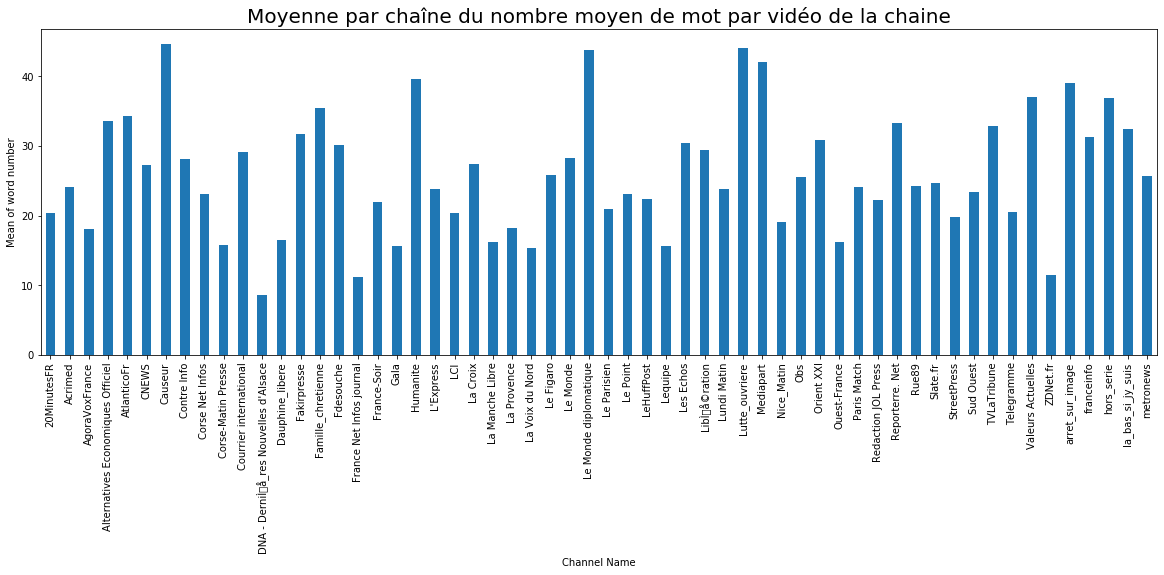

In [16]:
# tracé de la moyenne par chaîne du nombre de mots moyen de chaque vidéo de la chaîne

plt.figure(figsize = (20, 6))
X.meanNbrMotMoyenne.plot(kind = 'bar')
plt.title('Moyenne par chaîne du nombre moyen de mot par vidéo de la chaine', color = 'black', fontsize = 20)
plt.xlabel('Channel Name')
plt.ylabel('Mean of word number')

Text(0, 0.5, 'Mean of word number')

C:\Users\flore\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 131 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\flore\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 131 missing from current font.
  font.set_text(s, 0, flags=flags)


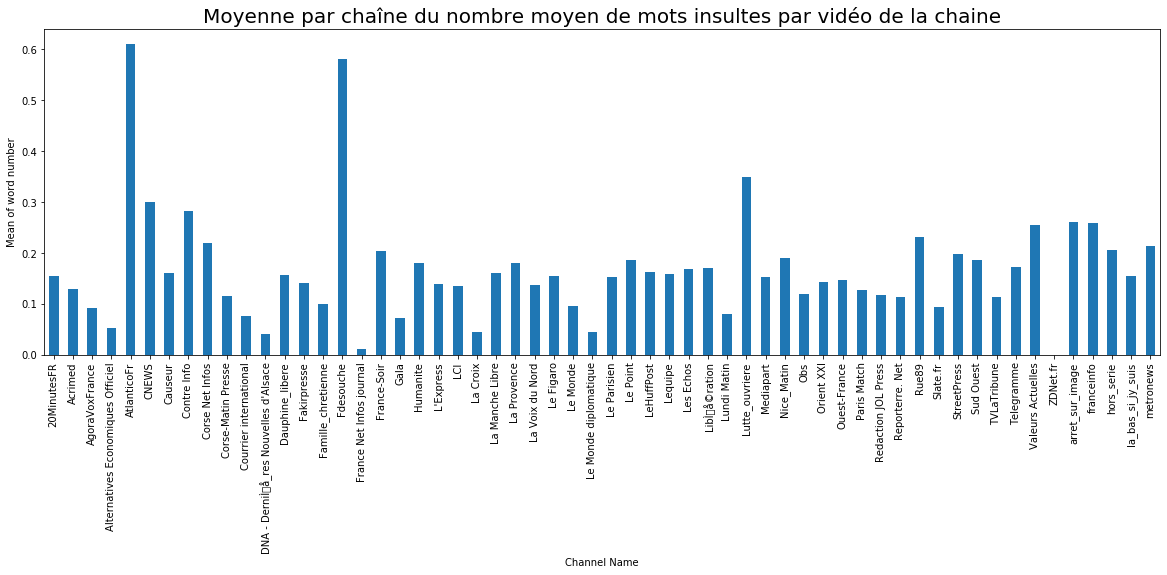

In [17]:
# tracé de la moyenne par chaîne du nombre de mots insulte moyen de chaque vidéo de la chaîne

plt.figure(figsize = (20, 6))
X.meanNbrMotInsulteMoyenne.plot(kind = 'bar')
plt.title('Moyenne par chaîne du nombre moyen de mots insultes par vidéo de la chaine', color = 'black', fontsize = 20)
plt.xlabel('Channel Name')
plt.ylabel('Mean of word number')

Text(0, 0.5, 'Mean of word number')

C:\Users\flore\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 131 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\flore\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 131 missing from current font.
  font.set_text(s, 0, flags=flags)


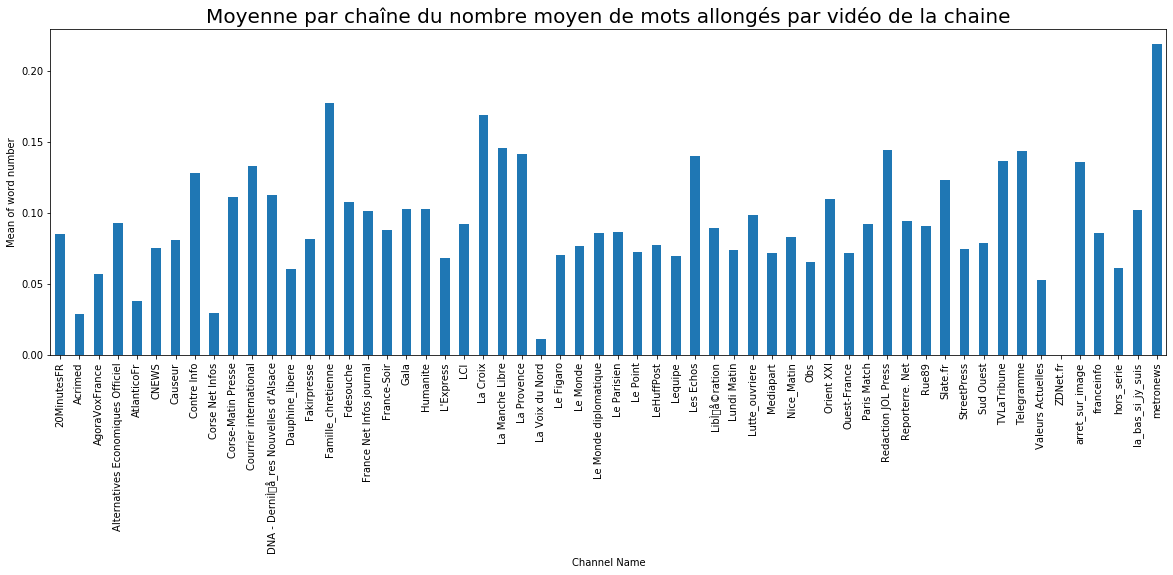

In [18]:
# tracé de la moyenne par chaîne du nombre de mots allongés moyen de chaque vidéo de la chaîne

plt.figure(figsize = (20, 6))
X.meanNbrMotAllongMoyenne.plot(kind = 'bar')
plt.title('Moyenne par chaîne du nombre moyen de mots allongés par vidéo de la chaine', color = 'black', fontsize = 20)
plt.xlabel('Channel Name')
plt.ylabel('Mean of word number')

Text(0, 0.5, 'Mean of word number')

C:\Users\flore\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 131 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\flore\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 131 missing from current font.
  font.set_text(s, 0, flags=flags)


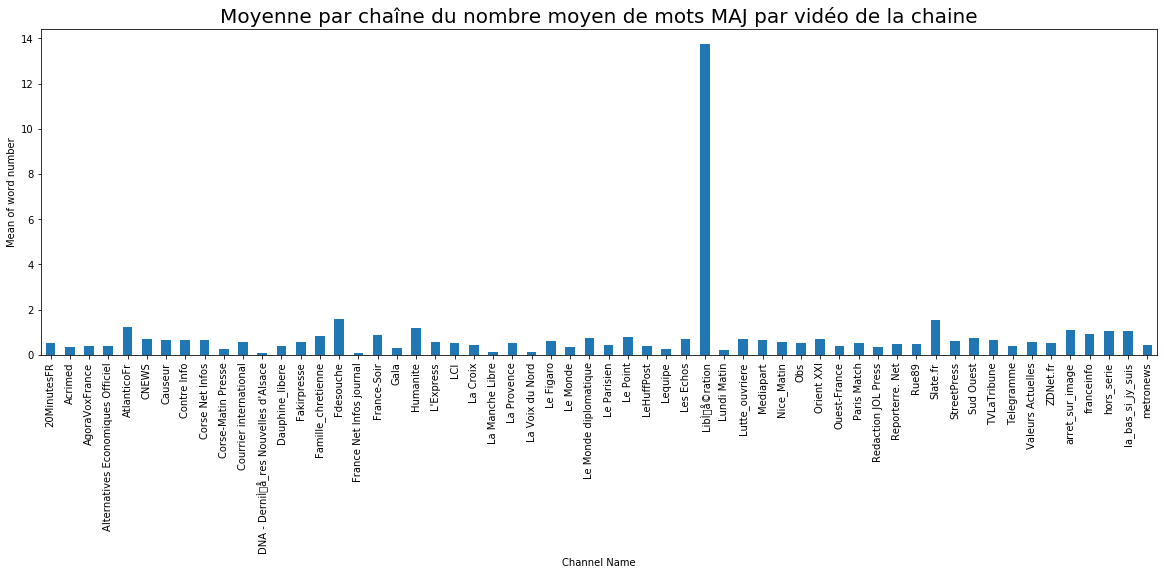

In [19]:
# tracé de la moyenne par chaîne du nombre de mots MAJ moyen de chaque vidéo de la chaîne

plt.figure(figsize = (20, 6))
X.meanNbrMotMAJMoyenne.plot(kind = 'bar')
plt.title('Moyenne par chaîne du nombre moyen de mots MAJ par vidéo de la chaine', color = 'black', fontsize = 20)
plt.xlabel('Channel Name')
plt.ylabel('Mean of word number')

<Figure size 432x288 with 0 Axes>

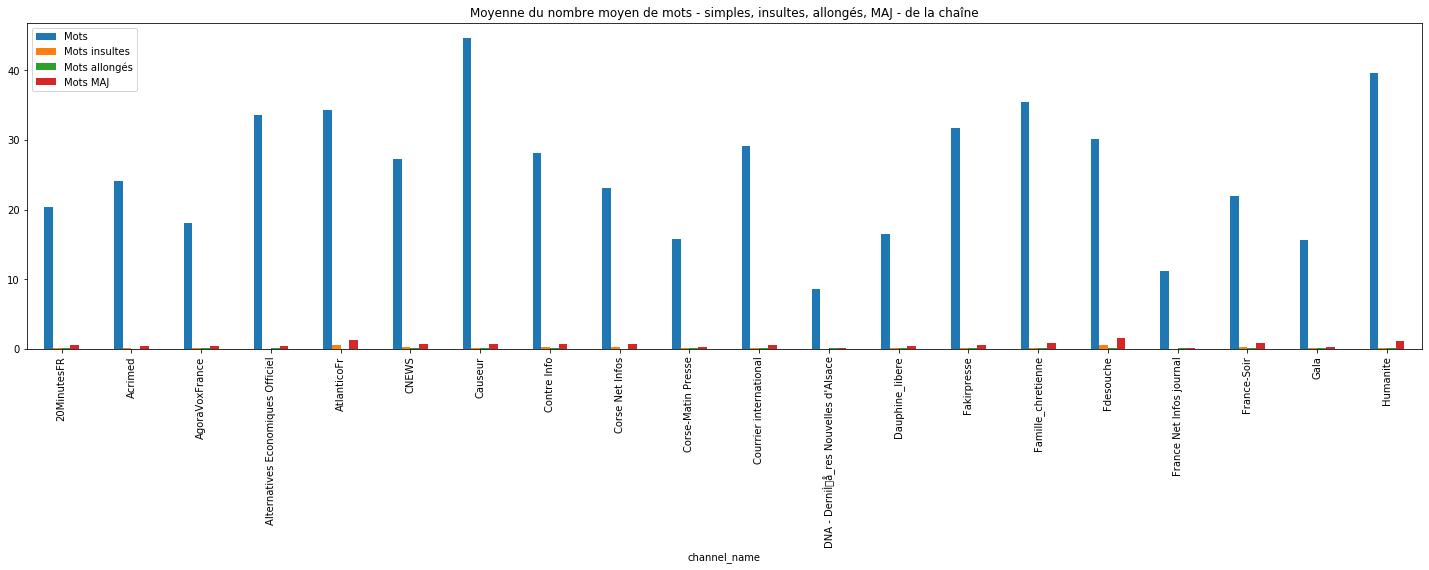

In [20]:
# plot des mêmes paramètres vus ci-dessus, pour la 1ère à la 19ème chaîne YouTube
# on voit que la proportion de mots insultes/allongés/MAJ est très faible comparé au nombre de mots,
# ce qui rend difficile la comparaison.

plt.figure()
X.iloc[0:20, :].plot(kind = 'bar', figsize = (25, 6))
plt.title('Moyenne du nombre moyen de mots - simples, insultes, allongés, MAJ - de la chaîne')
plt.legend(['Mots', 'Mots insultes', 'Mots allongés', 'Mots MAJ'])
plt.show()

<Figure size 432x288 with 0 Axes>

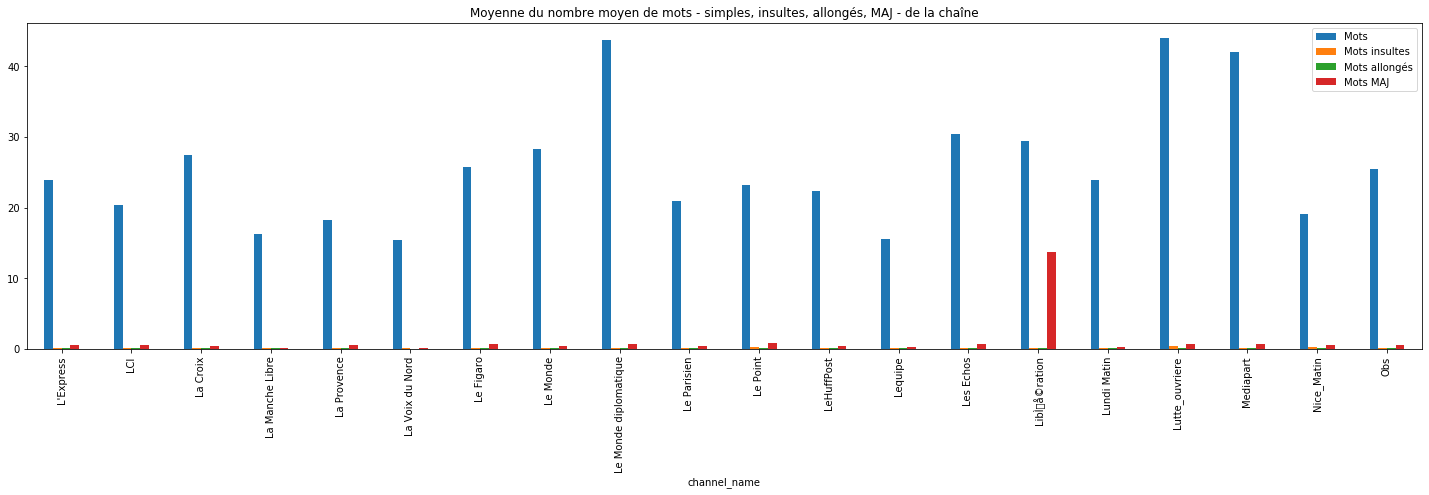

In [21]:
# plot des mêmes paramètres vus ci-dessus, pour la 20ème à la 39ème chaîne YouTube

plt.figure()
X.iloc[20:40, :].plot(kind = 'bar', figsize = (25, 6))
plt.title('Moyenne du nombre moyen de mots - simples, insultes, allongés, MAJ - de la chaîne')
plt.legend(['Mots', 'Mots insultes', 'Mots allongés', 'Mots MAJ'])
plt.show()

<Figure size 432x288 with 0 Axes>

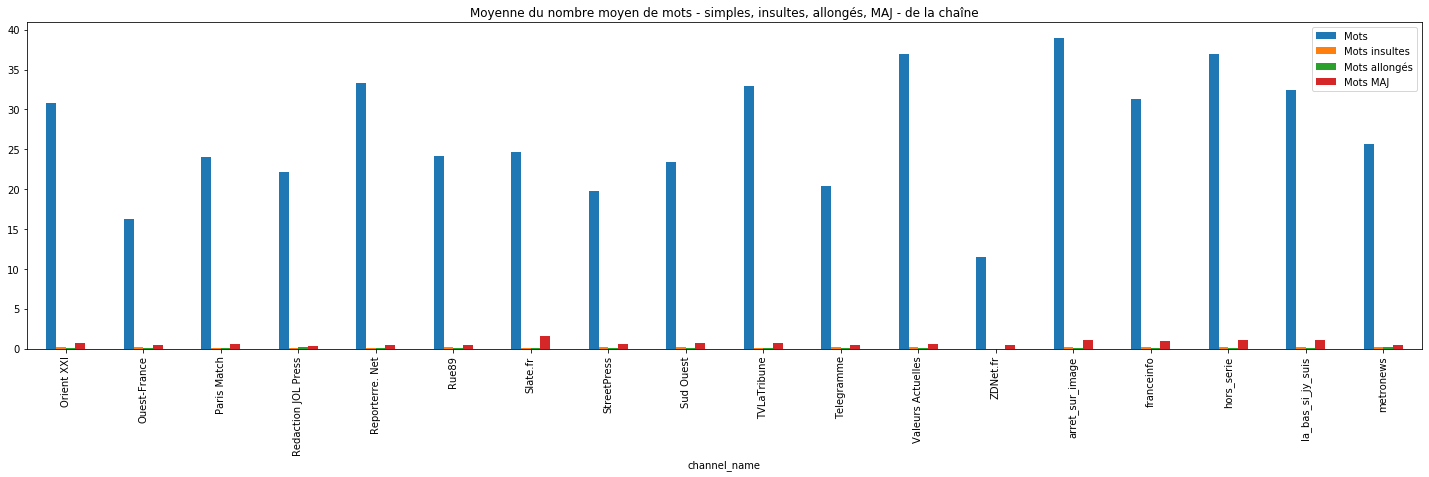

In [22]:
# plot des mêmes paramètres vus ci-dessus, pour la 40ème à la dernière chaîne YouTube

plt.figure()
X.iloc[40:, :].plot(kind = 'bar', figsize = (25, 6))
plt.title('Moyenne du nombre moyen de mots - simples, insultes, allongés, MAJ - de la chaîne')
plt.legend(['Mots', 'Mots insultes', 'Mots allongés', 'Mots MAJ'])
plt.show()

Nous pouvons voir que pour la majorité des chaînes, la plupart des mots contenus dans les commentaires ne sont pas des insultes, des mots allongés ou bien des mots en majuscule.

<Figure size 432x288 with 0 Axes>

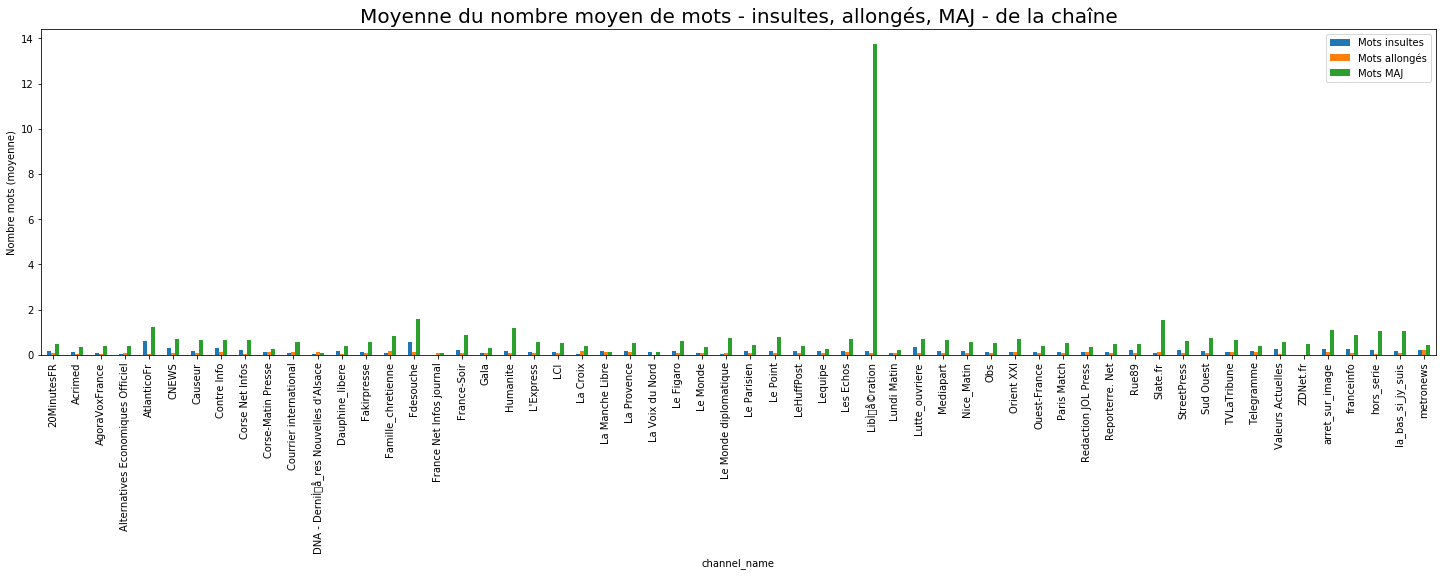

In [43]:
# on enlève alors le nombre de mots simples pour avoir une idée du nombre de mots "toxiques" qui prédomine

plt.figure()
X.iloc[:, 1:].plot(kind = 'bar', figsize = (25, 6))
plt.title('Moyenne du nombre moyen de mots - insultes, allongés, MAJ - de la chaîne', fontsize = 20)
plt.legend(['Mots insultes', 'Mots allongés', 'Mots MAJ'])
plt.ylabel('Nombre mots (moyenne)')
plt.show()

In [44]:
# Globalement, ce sont les majuscules qui dominent, suivi par les insultes et les mots allongés. 
# Les mots allongés ne représentent qu'une toute petite partie des mots utilisés en commentaires. 
# Sont-ils susceptibles d'intervenir dans le calcul de l'indice de toxicité ?
# on trace le nombre de mots insultes en fonction du nombre de mots allongés pour en avoir une idée.
# on trace également le nombre de mots insultes en fonction des autres paramètres ce qui nous fait 3 graphiques

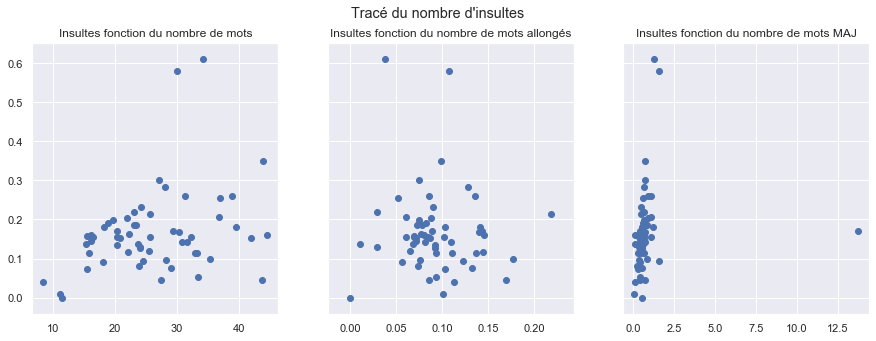

In [99]:
sns.set() # on fixe le style de seaborn même si on travaille sous matplotlib
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
fig.suptitle("Tracé du nombre d'insultes")
axes[0].set_title('Insultes fonction du nombre de mots')
axes[1].set_title('Insultes fonction du nombre de mots allongés')
axes[2].set_title('Insultes fonction du nombre de mots MAJ')
axes[0].scatter(X.iloc[:, 0], X.iloc[:, 1])
axes[1].scatter(X.iloc[:, 2], X.iloc[:, 1])
axes[2].scatter(X.iloc[:, 3], X.iloc[:, 1])

A priori, il n'y a pas de lien entre le nombre d'insultes dans les commentaires d'une vidéo, et le nombre moyen de mots simples ou allongés. Cependant, on remarque qu'une relation linéaire existe entre le nombre d'insulte et le nombre de mots MAJ utilisés.

Intéressons nous maintenant à la ponctuation.

In [23]:
# trouver la vidéo qui a le plus de commentaire (top level + commentaires en-dessous)

max_com = 0
i_best = 0
for i, com in enumerate(yt.message_count) :
    if com > max_com :
        i_best = i
        max_com = com
    else :
        max_com = max_com
        i_best = i_best
print(max_com, '\n', yt.iloc[i_best, :])

19336 
 video_id_court                                                  FFJBEPLe5Sg
video_id                   VVVmSG5fOC1laGRlbTg2ZkV2bEZnLUd3LkZGSkJFUExlNVNn
channel_id                                         UCfHn_8-ehdem86fEvlFg-Gw
nbrMot                                                               662808
nbrMotInsulte                                                          7227
nbrMotAllong                                                           1416
nbrMotMAJ                                                             14270
nbrExclMark                                                           11093
nbrQuestMark                                                           5520
nbrMotMoyenne                                                       34.2784
nbrMotInsulteMoyenne                                               0.373759
nbrMotAllongMoyenne                                               0.0732313
nbrMotMAJMoyenne                                                   0.738002
nbrE

In [25]:
# création d'une colonne indiquant un numéro unique pour chaque chaîne

from sklearn.preprocessing import LabelEncoder
le_channel_name = LabelEncoder()
yt['ind'] = le_channel_name.fit_transform(yt['channel_name'])
yt

,video_id_court,video_id,channel_id,nbrMot,nbrMotInsulte,nbrMotAllong,nbrMotMAJ,nbrExclMark,nbrQuestMark,nbrMotMoyenne,nbrMotInsulteMoyenne,nbrMotAllongMoyenne,nbrMotMAJMoyenne,nbrExclMarkMoyenne,nbrQuestMarkMoyenne,thread_count,comment_count,message_count,discussion_count,distinct_authors_count,authors_3channels_count,liked_authors_count,channel_name,subscriberCount,viewCount,categorie_new,categ_inst,ind
0,Uvvsvw_wxOs,VVU5R0d6QWhodmhKTzFoTDEwLUJjZ05BLlV2dnN2d193eE9z,UC9GGzAhhvhJO1hL10-BcgNA,3813,18,4,145,79,60,30.261900,0.142857,0.031746,1.150794,0.626984,0.476190,45,81,126,28,58,47,23,LeHuffPost,339922,225393312,Core,Pure Players,31
1,mCy1ZBdttwA,VVVYS0pyWWN6WTJfZkpFWmdGUEdZMEhRLm1DeTFaQmR0dHdB,UCXKJrYczY2_fJEZgFPGY0HQ,28,2,0,1,0,0,9.333333,0.666667,0.000000,0.333333,0.000000,0.000000,3,0,3,0,3,1,0,CNEWS,189971,132125693,Core,TV,5
2,iU3MyHMK5nU,VVU5R0d6QWhodmhKTzFoTDEwLUJjZ05BLmlVM015SE1LNW5V,UC9GGzAhhvhJO1hL10-BcgNA,3804,68,9,56,75,54,27.565220,0.492754,0.065217,0.405797,0.543478,0.391304,52,86,138,22,83,49,36,LeHuffPost,339922,225393312,Core,Pure Players,31
3,ZUim3AeURtk,VVViWjBDc3I5b3c2WGprZGQ1NDJPbWh3LlpVaW0zQWVVUnRr,UCbZ0Csr9ow6Xjkdd542Omhw,4,0,1,2,0,0,2.000000,0.000000,0.500000,1.000000,0.000000,0.000000,2,0,2,0,2,0,0,Telegramme,2862,2481100,Niche,Presse_regionale,50
4,n5Tg2vhLCAM,VVVoWldzNlBKWTBoTkQzODRkMl9ScmhRLm41VGcydmhMQ0FN,UChZWs6PJY0hND384d2_RrhQ,737,3,1,18,5,6,32.043478,0.130435,0.043478,0.782609,0.217391,0.260870,17,6,23,4,18,7,7,Les Echos,30010,6710737,Core,Presse nationale,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46097,0s_hwJrt_6E,VVVmSG5fOC1laGRlbTg2ZkV2bEZnLUd3LjBzX2h3SnJ0XzZF,UCfHn_8-ehdem86fEvlFg-Gw,16,0,0,0,3,0,5.333333,0.000000,0.000000,0.000000,1.000000,0.000000,3,0,3,0,3,1,0,Le Parisien,149018,85536183,Core,Presse_regionale,29
46098,ktsFSiFN1VY,VVVZcFJEbmhrNUg4aDE2anBTODR1cXNBLmt0c0ZTaUZOMVZZ,UCYpRDnhk5H8h16jpS84uqsA,228,1,1,0,0,1,228.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1,0,1,0,1,0,0,Le Monde,568615,134570352,Core,Presse nationale,27
46099,#NOM?,VVVYS0pyWWN6WTJfZkpFWmdGUEdZMEhRLi1abDVDaUtkZkFz,UCXKJrYczY2_fJEZgFPGY0HQ,287,2,0,3,2,0,35.875000,0.250000,0.000000,0.375000,0.250000,0.000000,8,0,8,0,7,5,3,CNEWS,189971,132125693,Core,TV,5
46100,CyHXcpFlrTg,VVVDRHpfWFllS1dkME9JeWpwOTVkcXlRLkN5SFhjcEZsclRn,UCCDz_XYeKWd0OIyjp95dqyQ,176,0,0,0,6,3,58.666670,0.000000,0.000000,0.000000,2.000000,1.000000,2,1,3,1,3,0,1,Le Figaro,180173,140135417,Core,Presse nationale,26


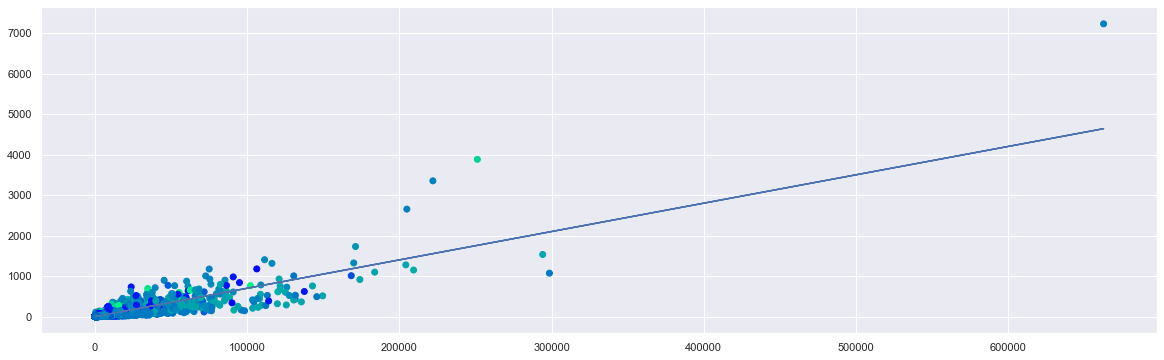

In [183]:
# scatter plot des données pour essayer de voir si des clusters se forment selon des variables
from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress(yt['nbrMot'], yt['nbrMotInsulte'])
fitLine = slope * yt['nbrMot'] + intercept
fig, ax = plt.subplots(1, 1, figsize=(20,6))
ax.plot(yt['nbrMot'], fitLine, c='b')
ax.scatter(yt['nbrMot'], yt['nbrMotInsulte'], c = list(yt['ind']), cmap = 'winter')

Text(0.5, 1.0, "Nombre d'insultes en fonction du nombre d'abonnés des chaînes")

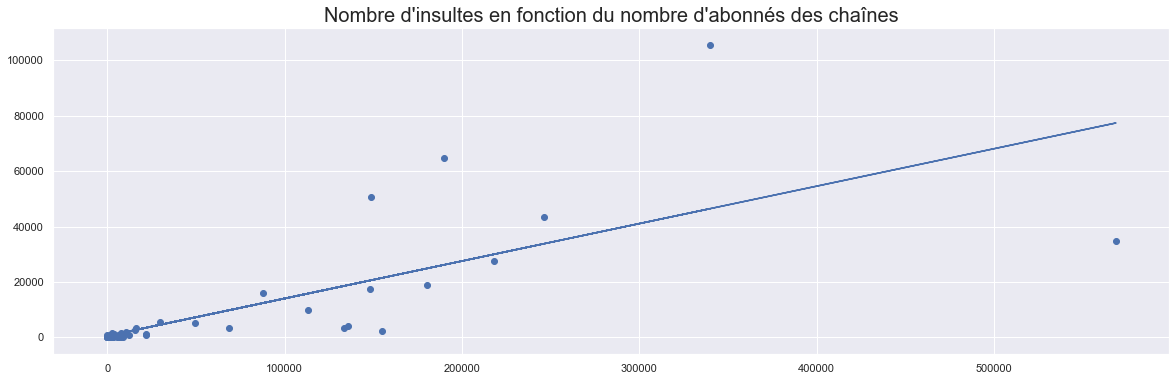

In [190]:
slope1, intercept1, r_value, p_value, std_err = linregress(yt.groupby('channel_name')['subscriberCount'].mean(),
                                                         yt.groupby('channel_name')['nbrMotInsulte'].sum())
fitLine = slope1 * yt.groupby('channel_name')['subscriberCount'].mean() + intercept1
fig1, ax1 = plt.subplots(1, 1, figsize=(20,6))
ax1.plot(yt.groupby('channel_name')['subscriberCount'].mean(), fitLine, c='b')
ax1.scatter(yt.groupby('channel_name')['subscriberCount'].mean(), yt.groupby('channel_name')['nbrMotInsulte'].sum())
ax1.set_title("Nombre d'insultes en fonction du nombre d'abonnés des chaînes", fontsize=20)

Plus il y a d'abonnés à la chaîne, plus il y a d'insultes émises dans les commentaires des vidéos.
'Le Monde' - i.e. la chaîne qui a le plus d'abonnés dans la liste - ne répond pas à cette règle. Pourquoi ?

Text(0.5, 1.0, "Nombre d'insultes en fonction du nombre de vues de la chaîne")

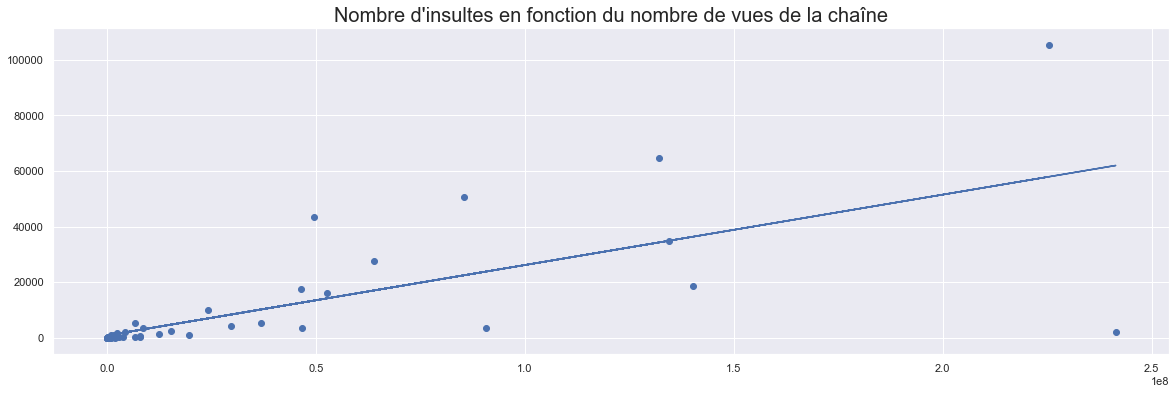

In [191]:
slope2, intercept2, r_value, p_value, std_err = linregress(yt.groupby('channel_name')['viewCount'].mean(),
                                                          yt.groupby('channel_name')['nbrMotInsulte'].sum())
fitLine = slope2 * yt.groupby('channel_name')['viewCount'].mean() + intercept2
fig2, ax2 = plt.subplots(1, 1, figsize=(20,6))
ax2.plot(yt.groupby('channel_name')['viewCount'].mean(), fitLine, c='b')
ax2.scatter(yt.groupby('channel_name')['viewCount'].mean(), yt.groupby('channel_name')['nbrMotInsulte'].sum())
ax2.set_title("Nombre d'insultes en fonction du nombre de vues de la chaîne", fontsize = 20)

La tendance de ce scatter plot est ascendante, ce qui veut dire que globalement, plus il y a de vues sur une chaîne, plus il y a d'insultes, ce qui paraît logique.

In [29]:
print('Nombre de vidéo par catégorie de chaîne', '\n', yt.groupby('categorie_new').channel_name.count())

Nombre de vidéo par catégorie de chaîne 
 categorie_new
Core        38101
Niche        6873
Partisan     1128
Name: channel_name, dtype: int64


C:\Users\flore\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if sys.path[0] == '':
C:\Users\flore\Anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\flore\Anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:140: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
C:\Users\flore\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\flore\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid val

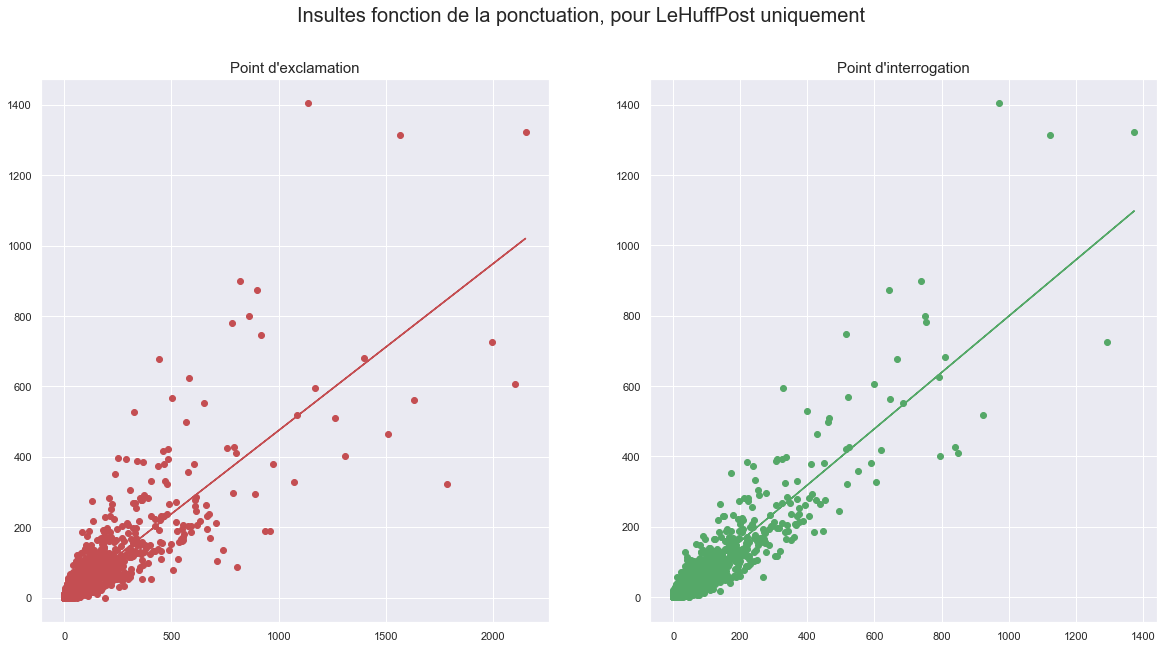

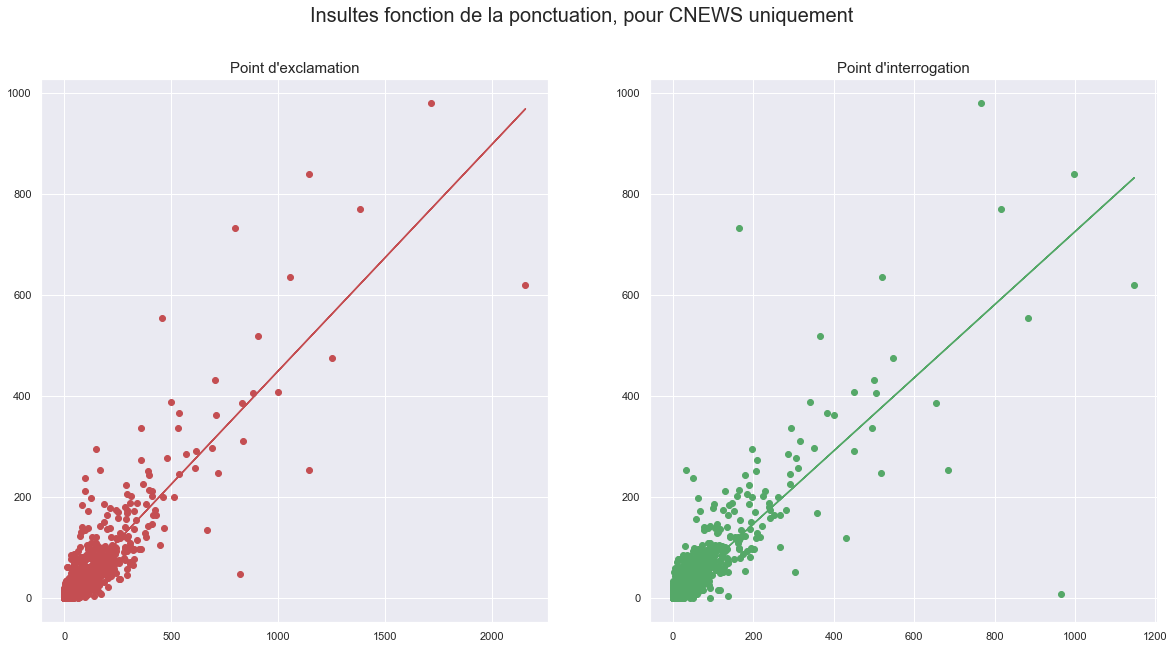

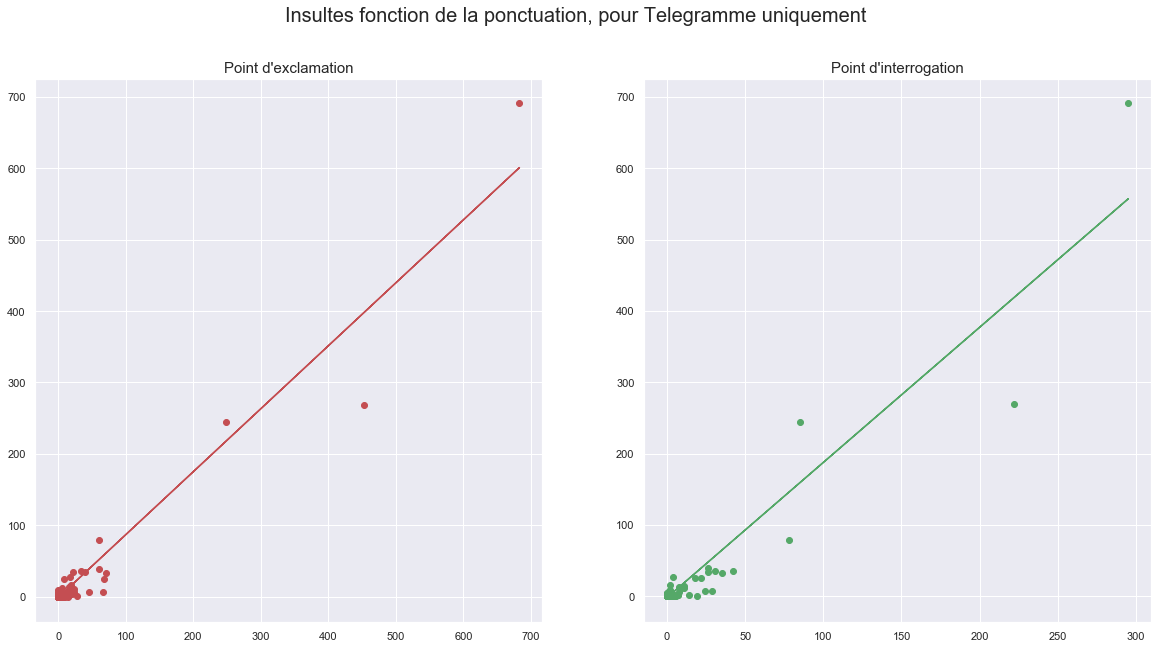

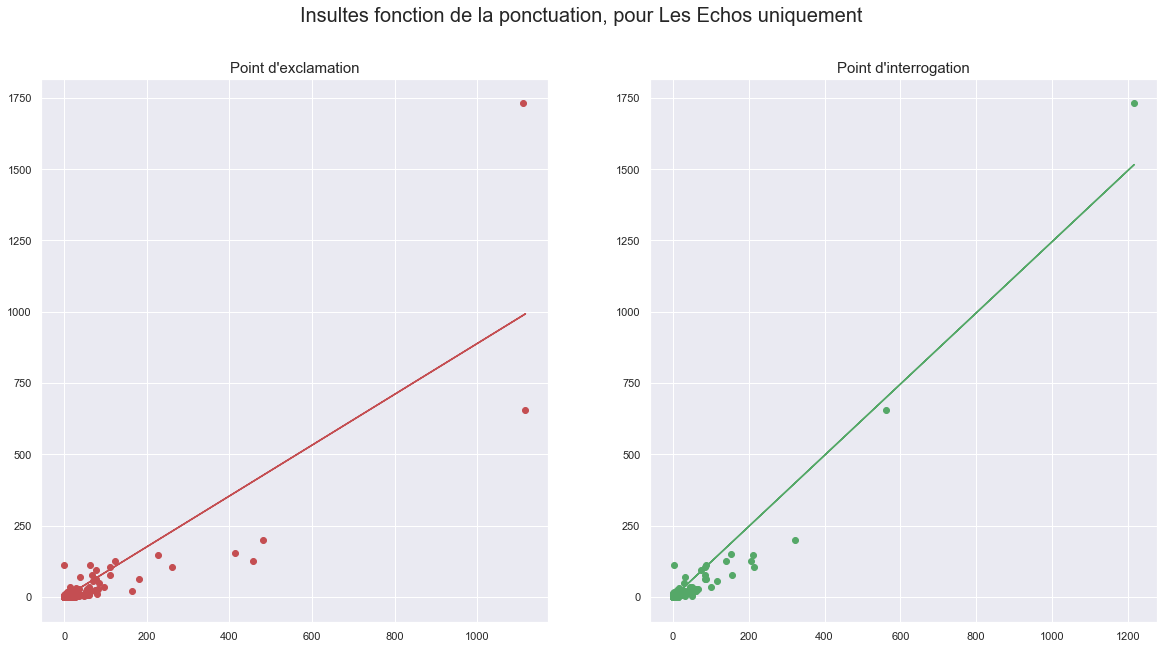

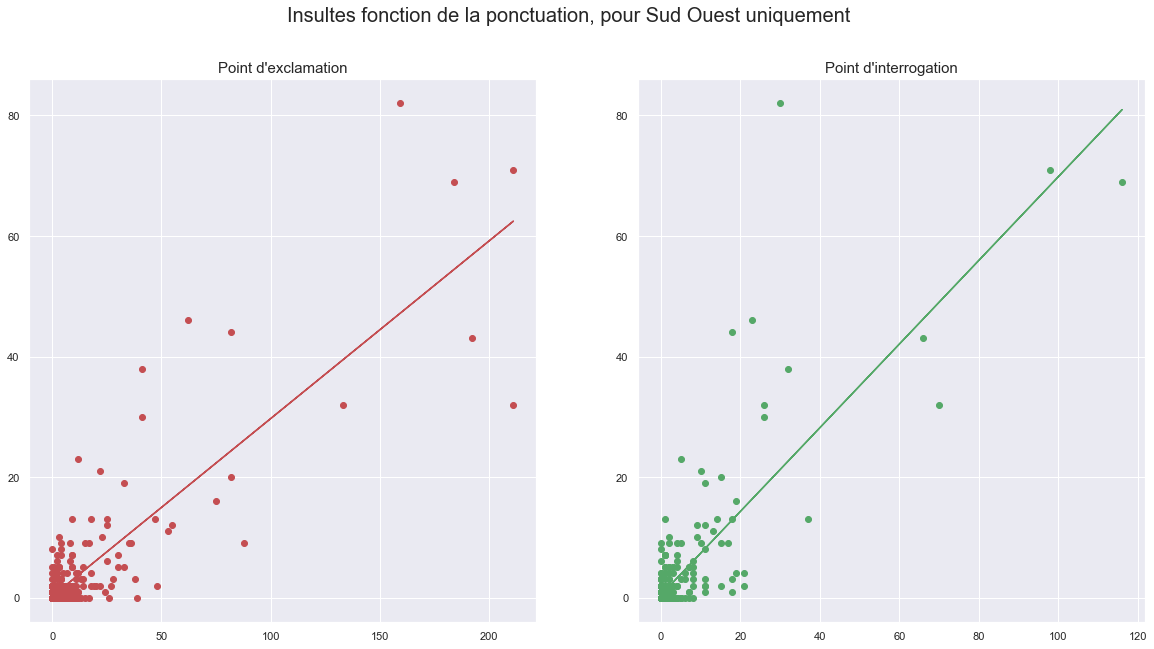

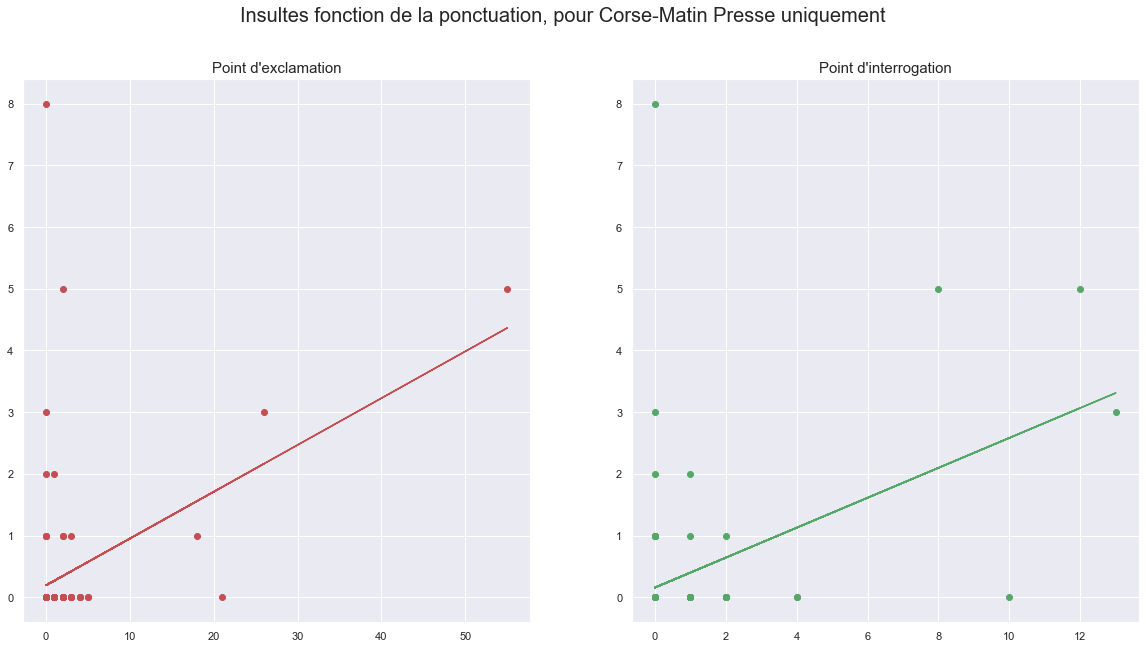

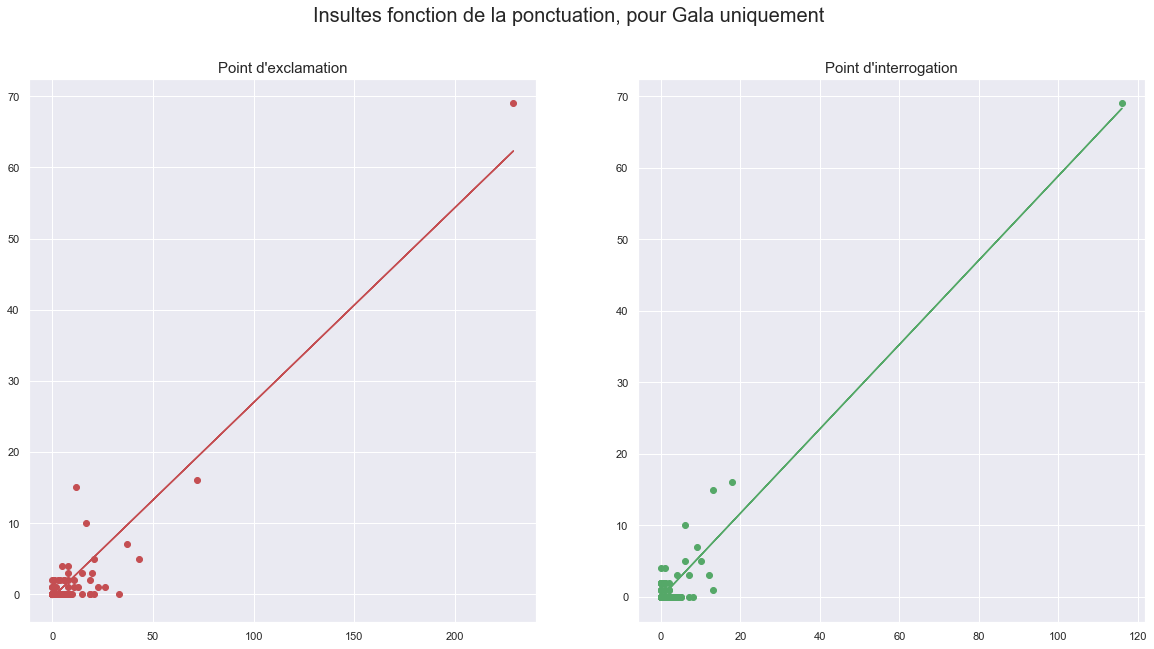

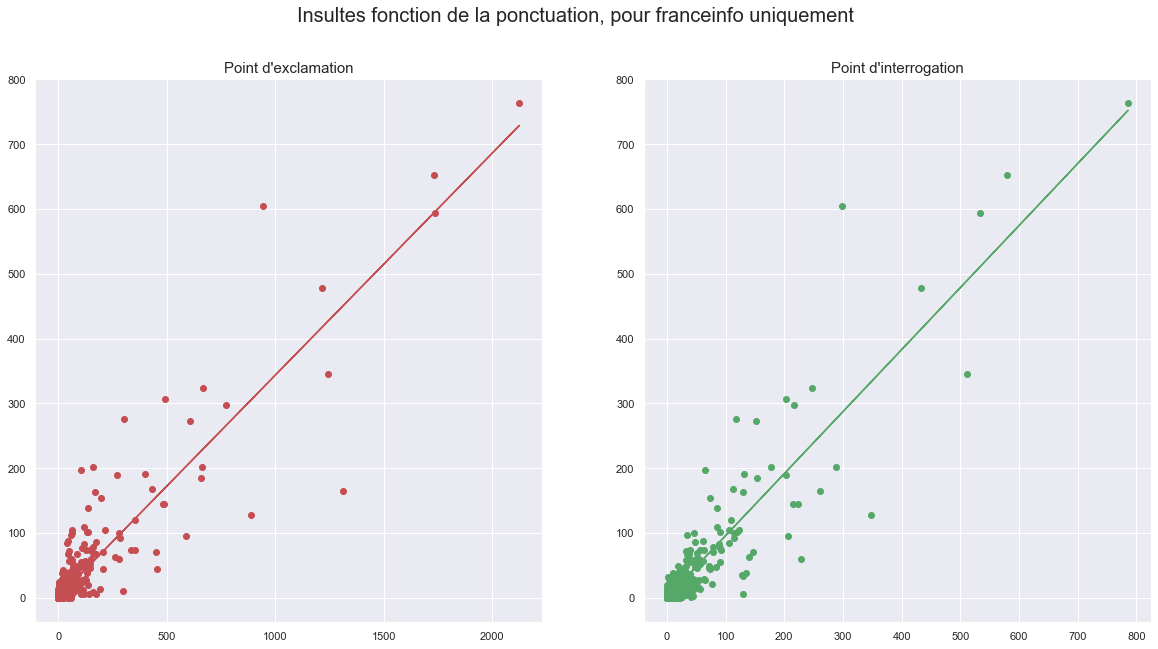

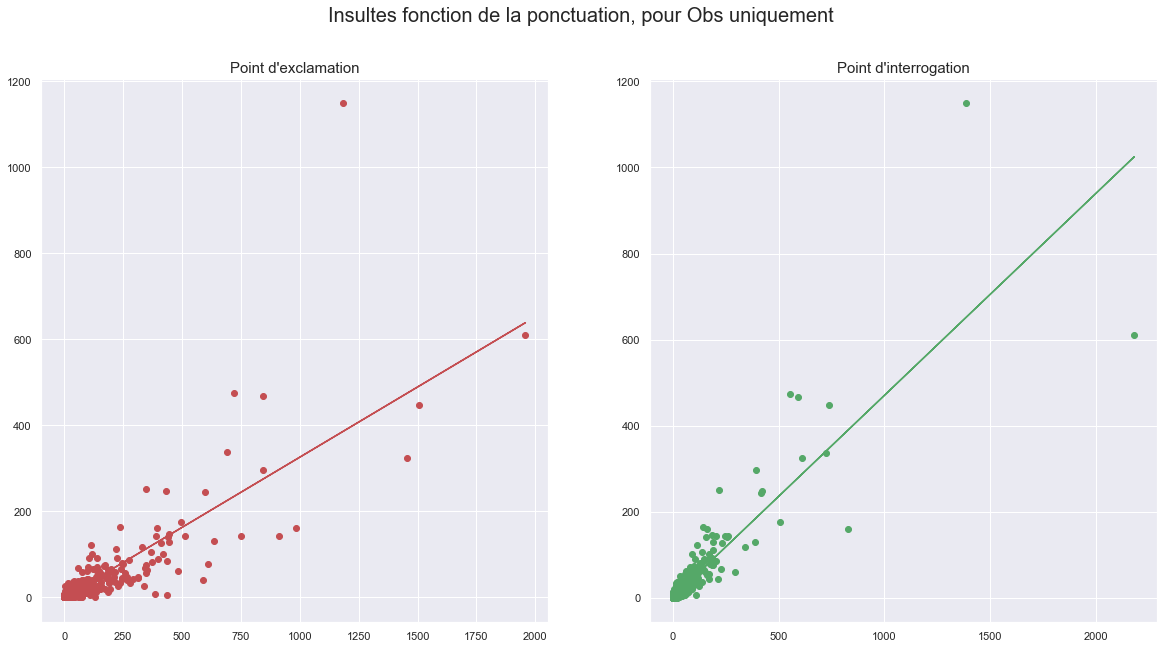

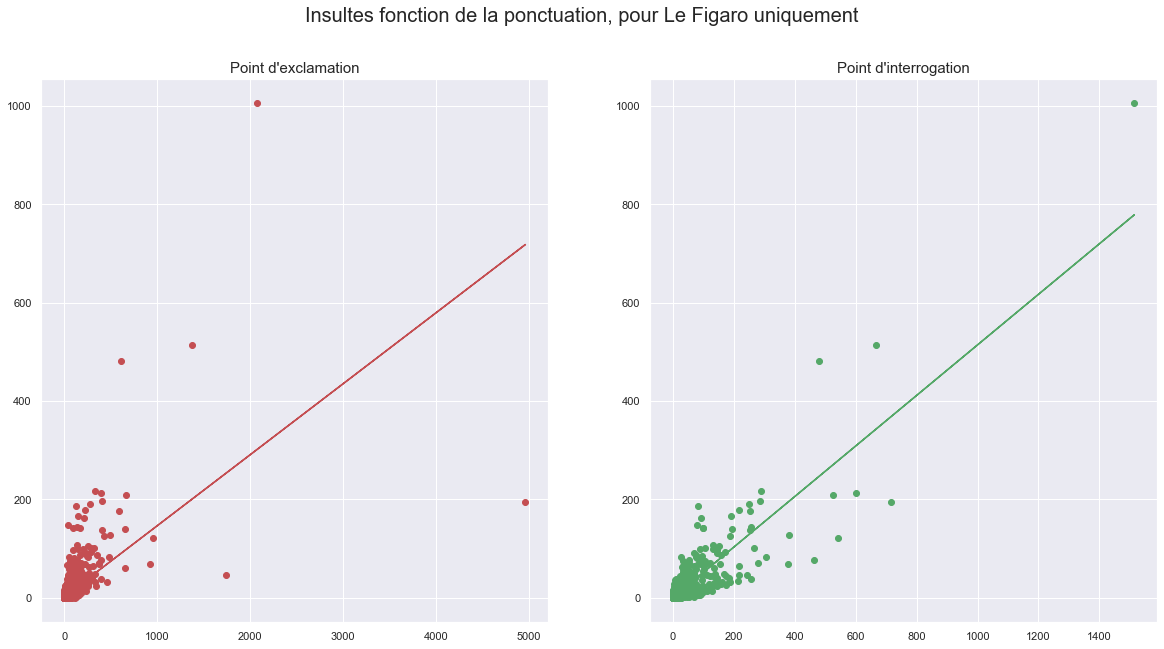

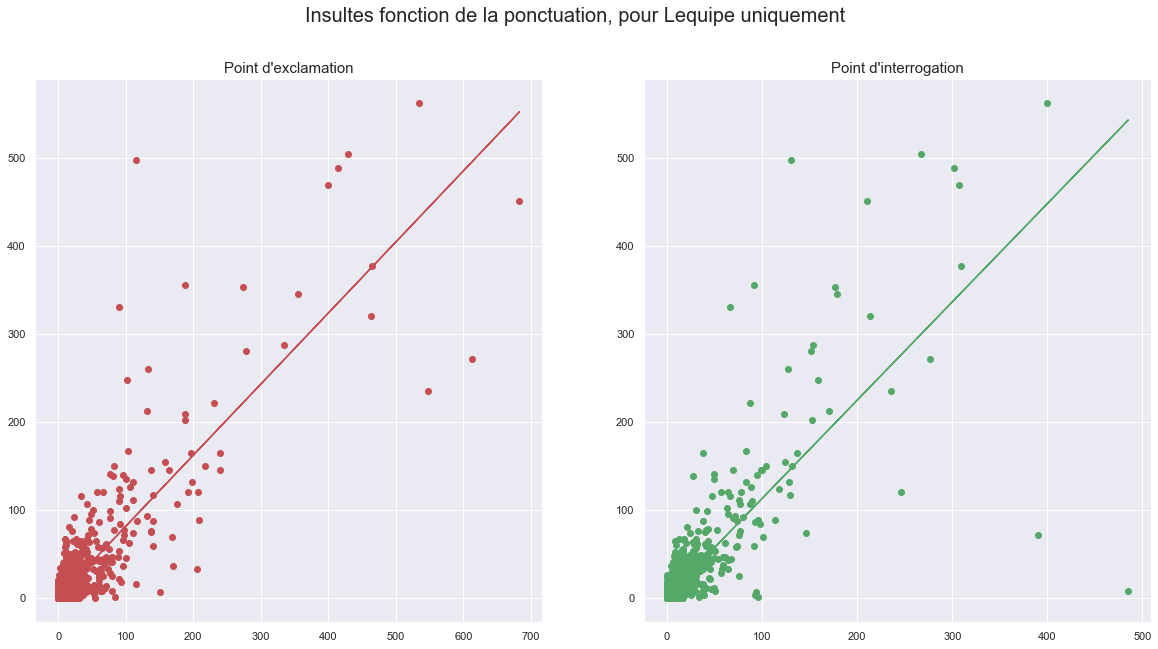

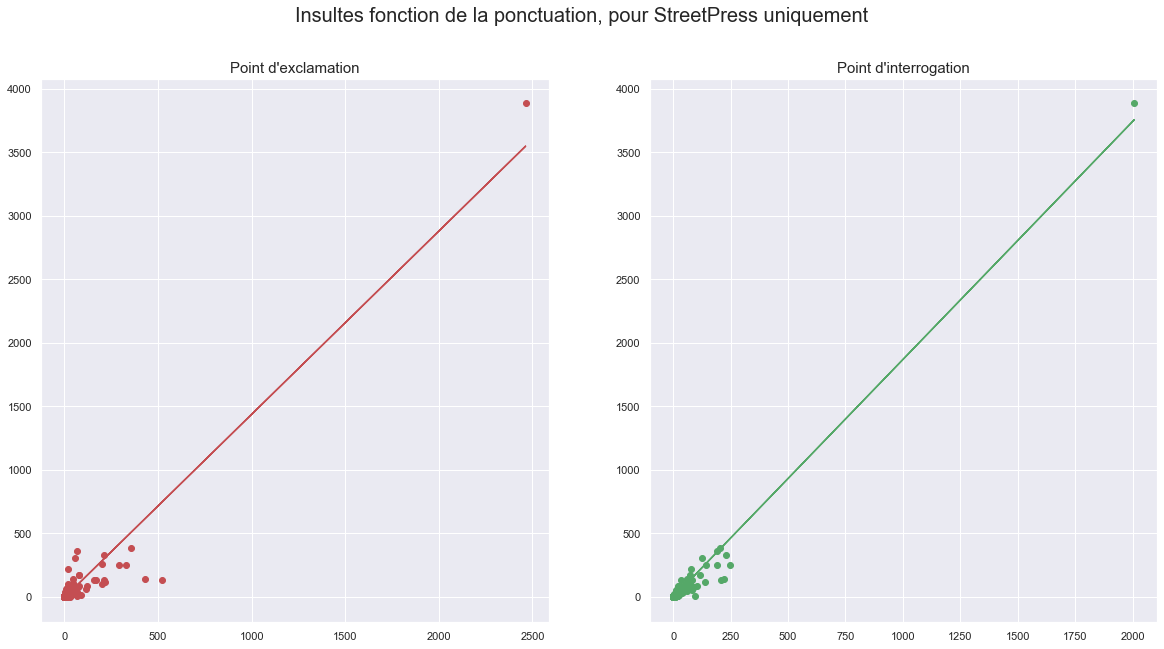

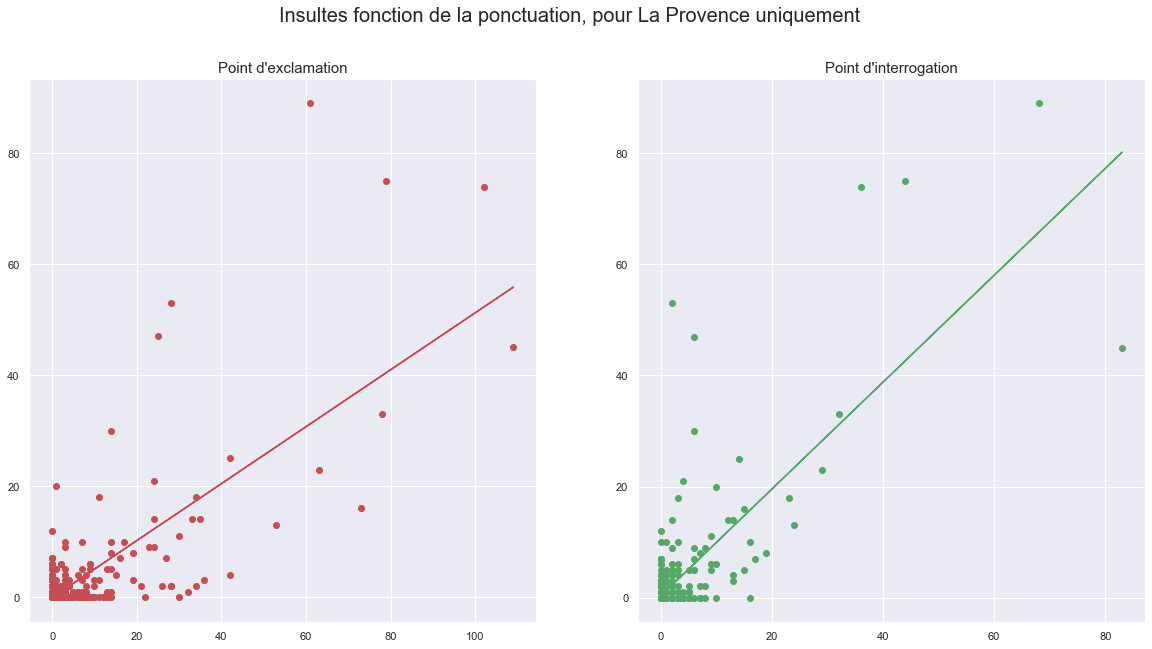

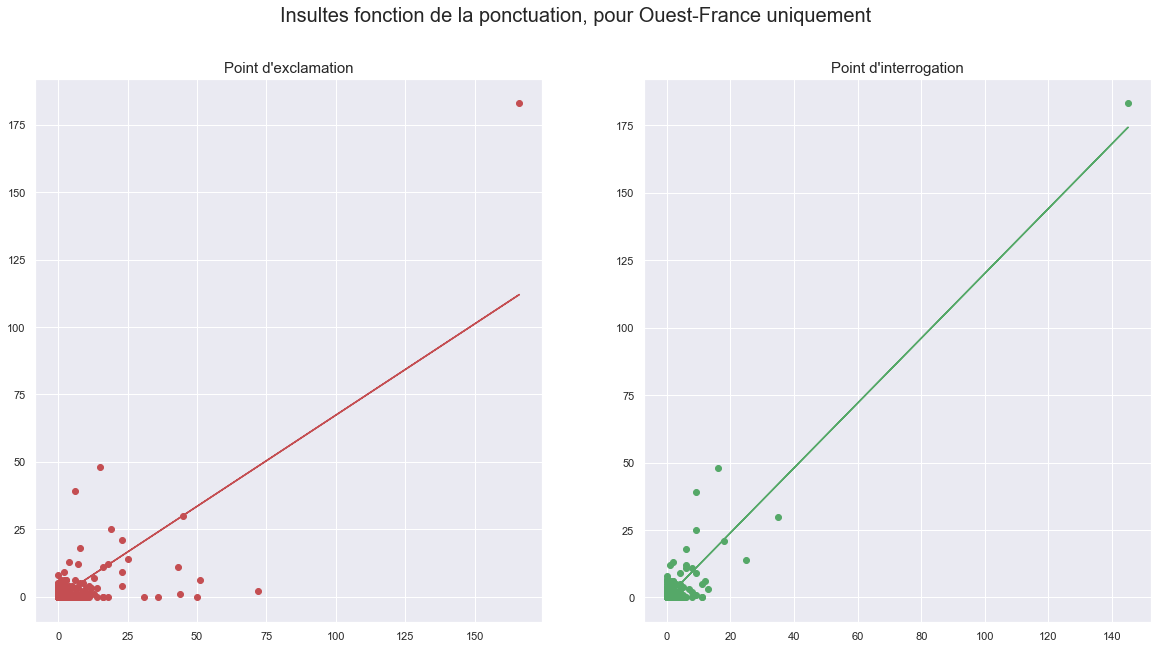

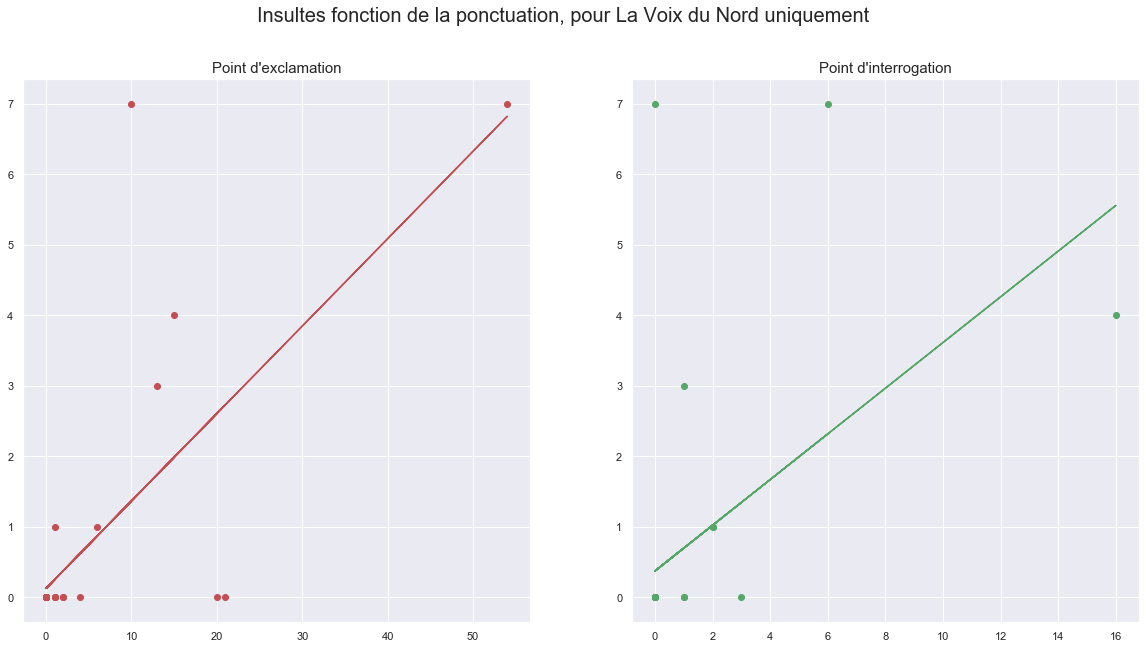

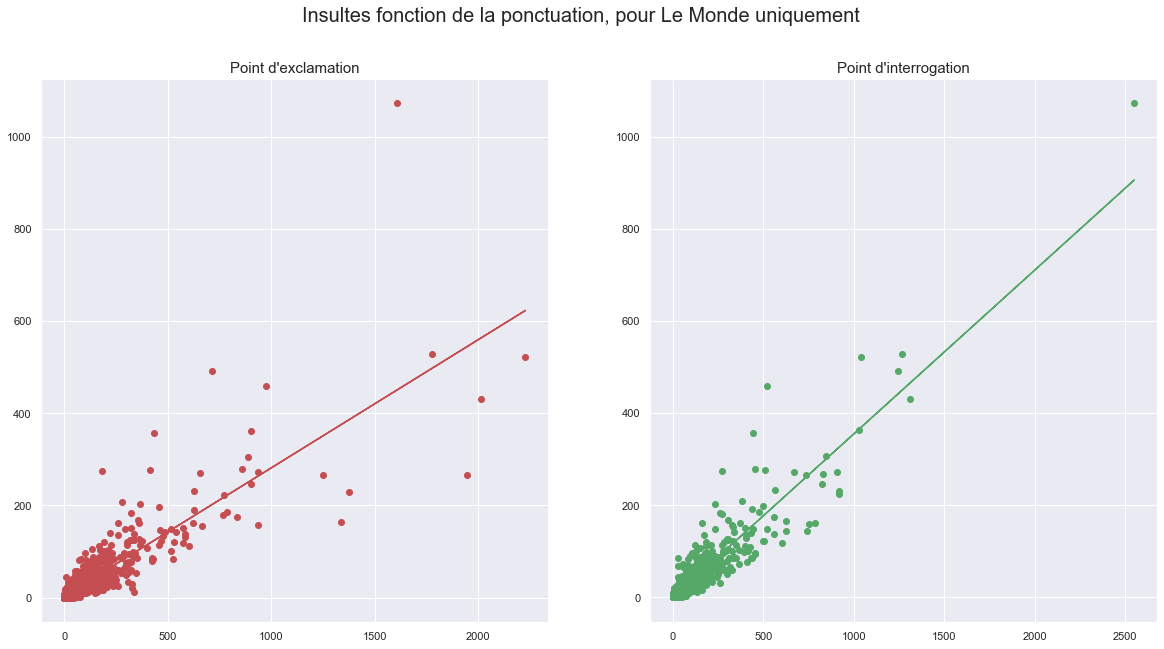

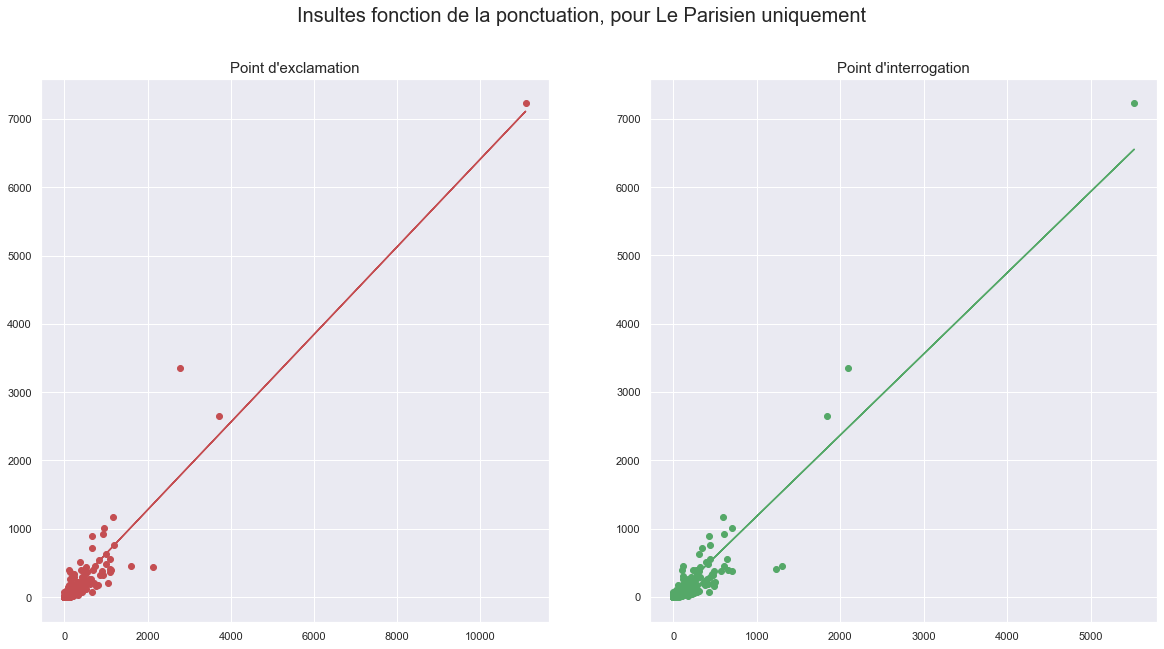

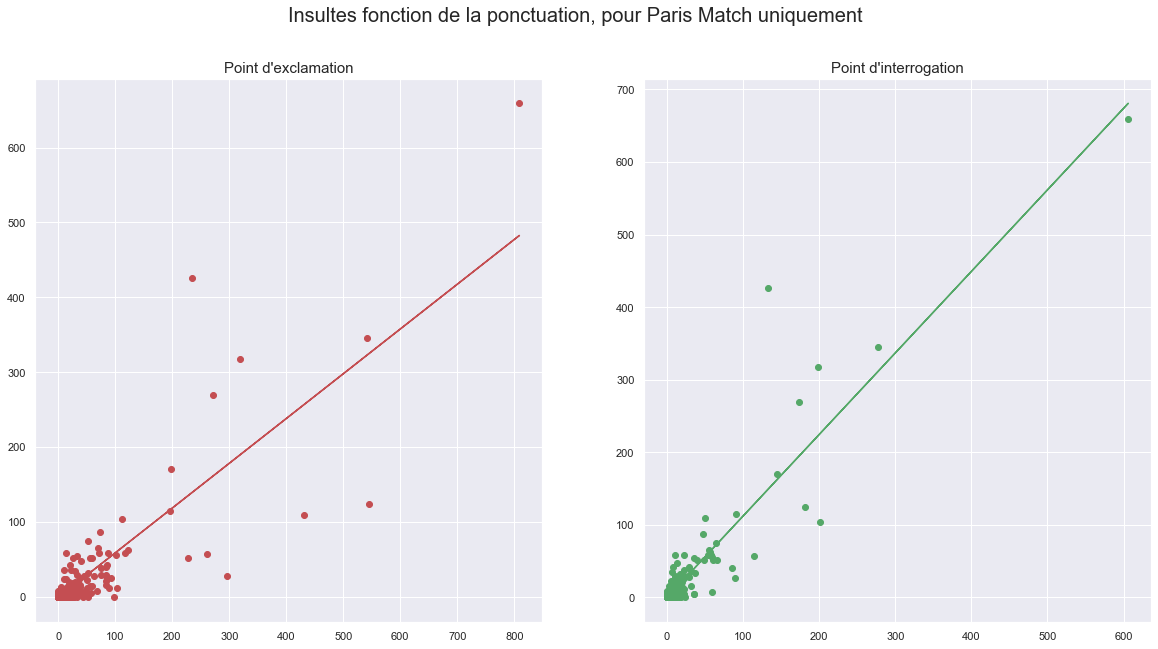

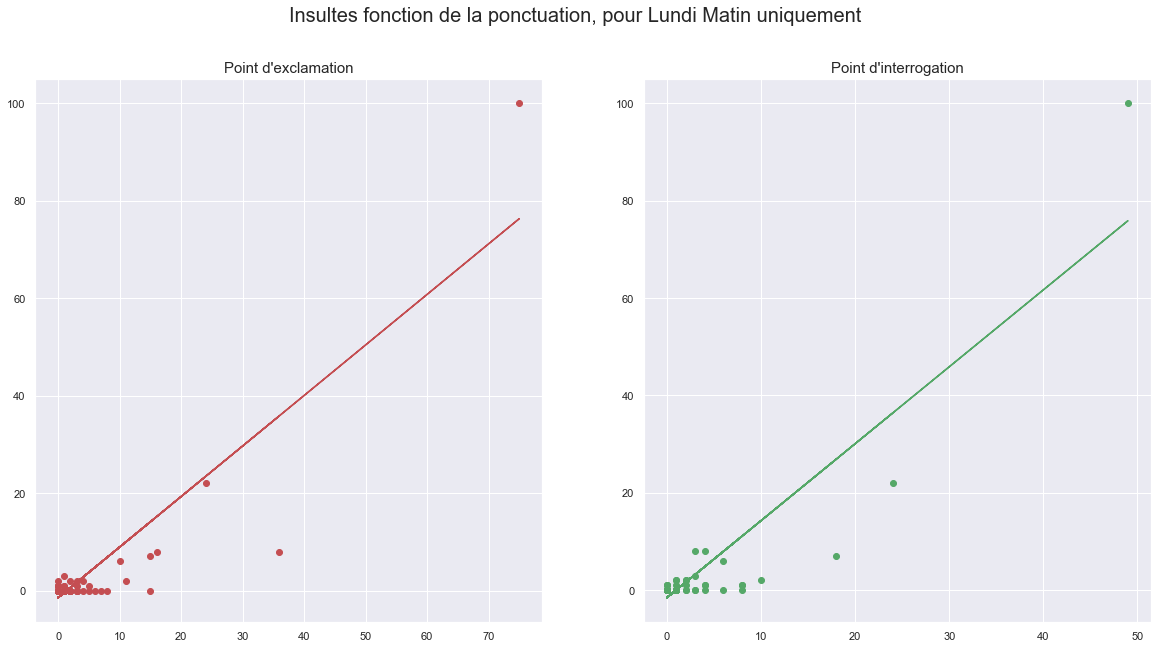

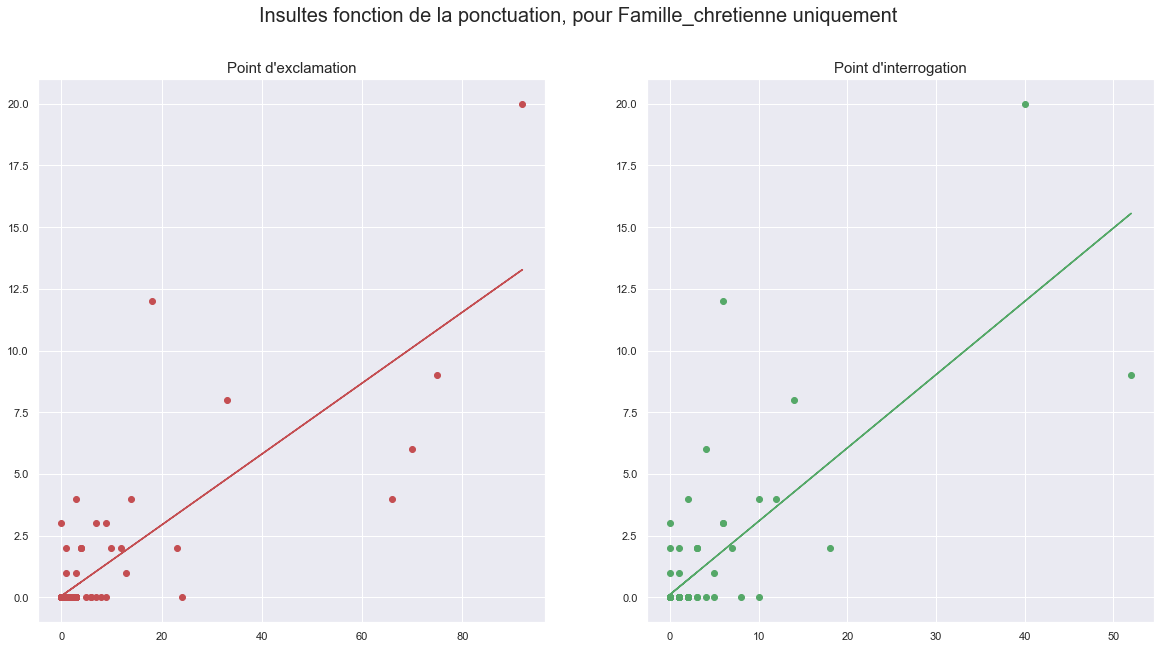

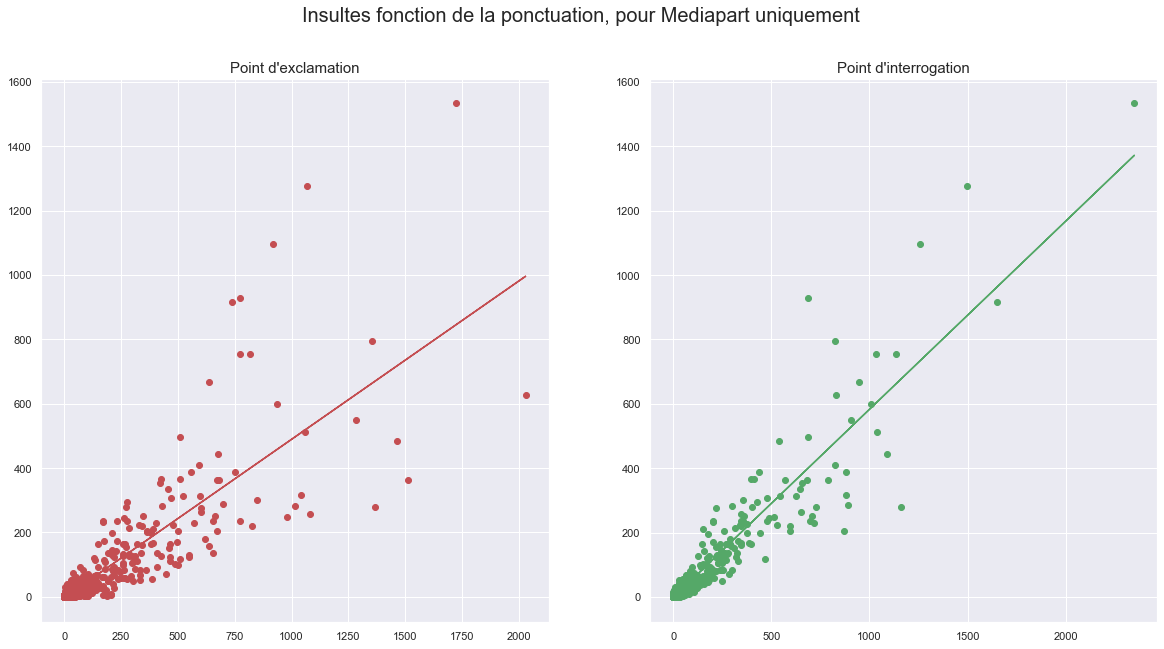

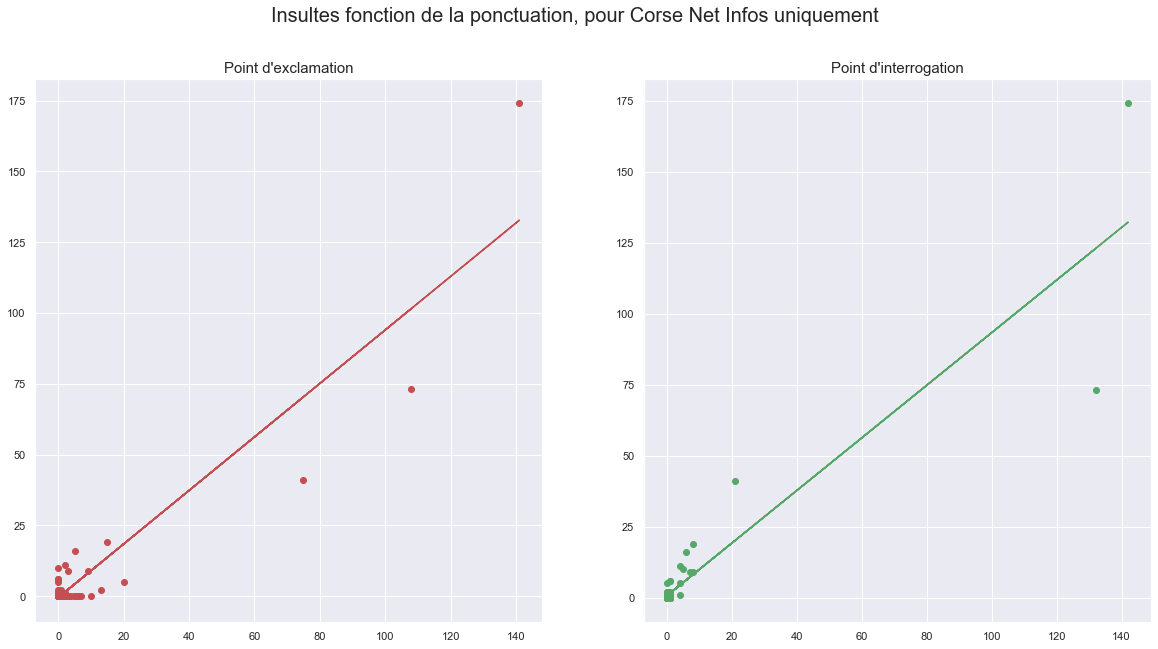

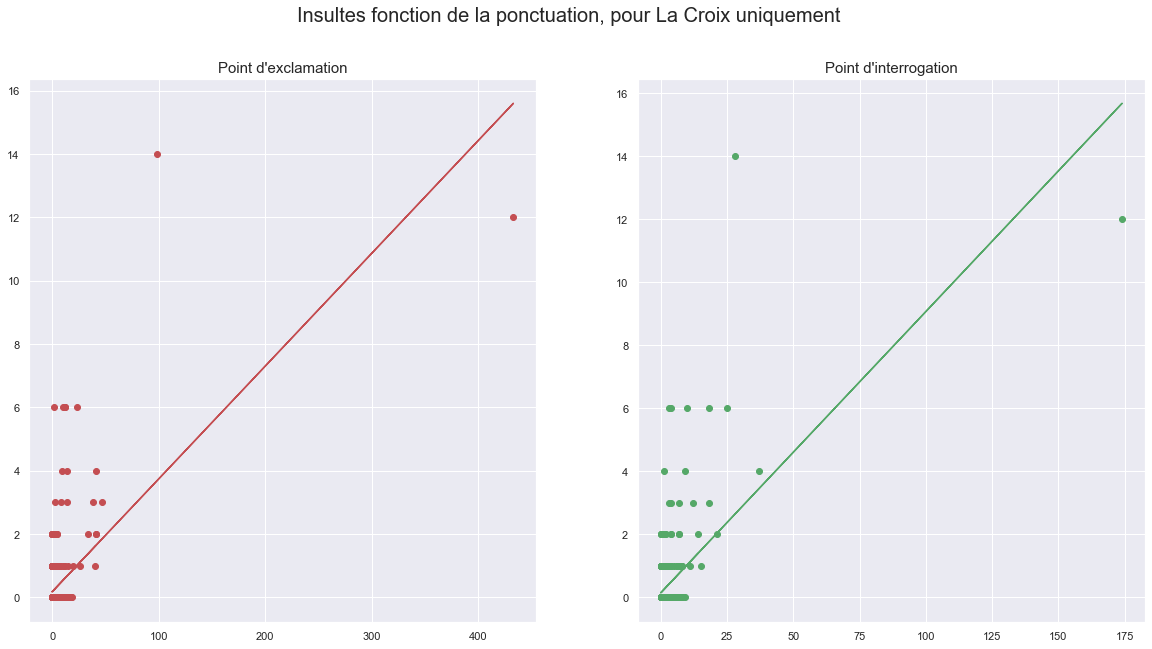

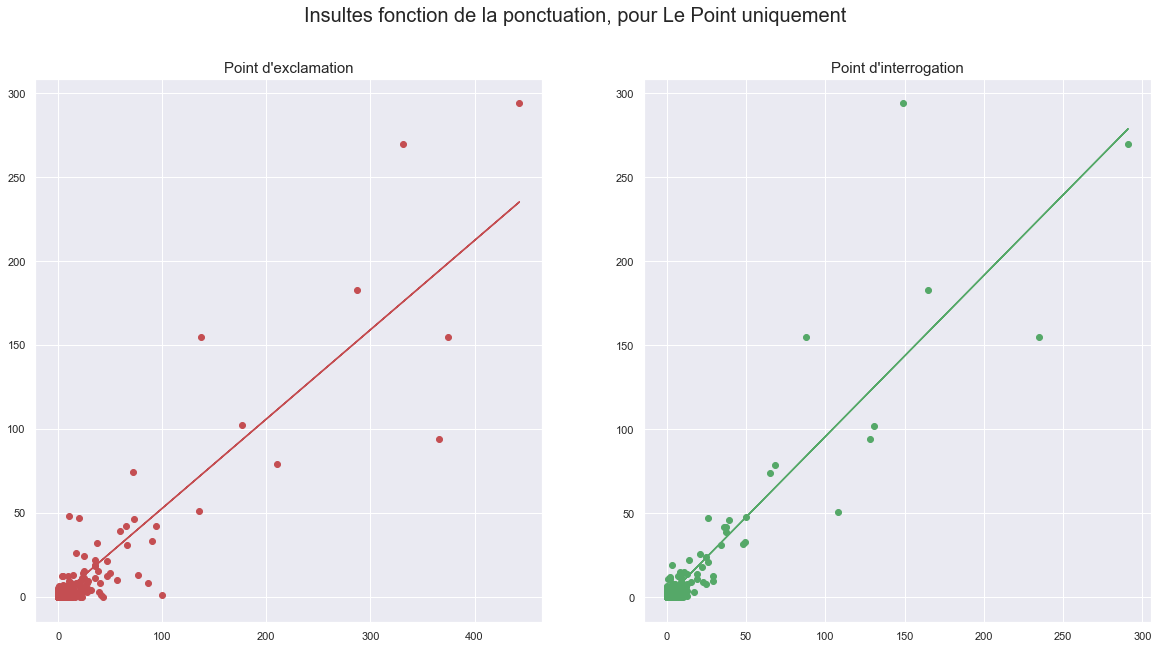

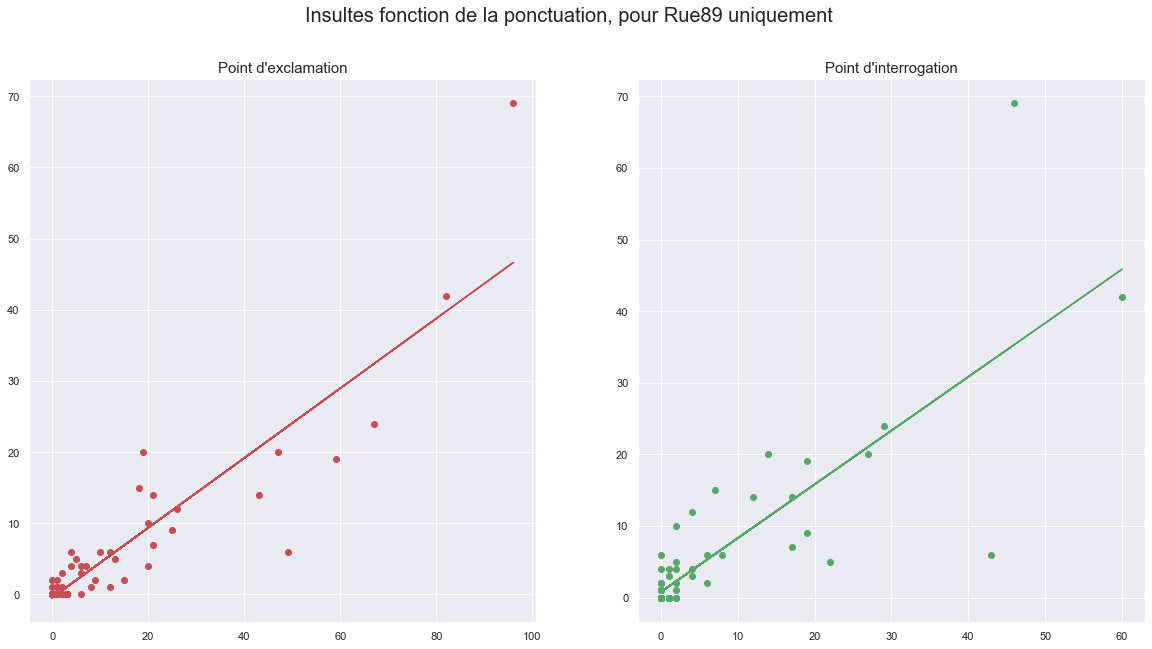

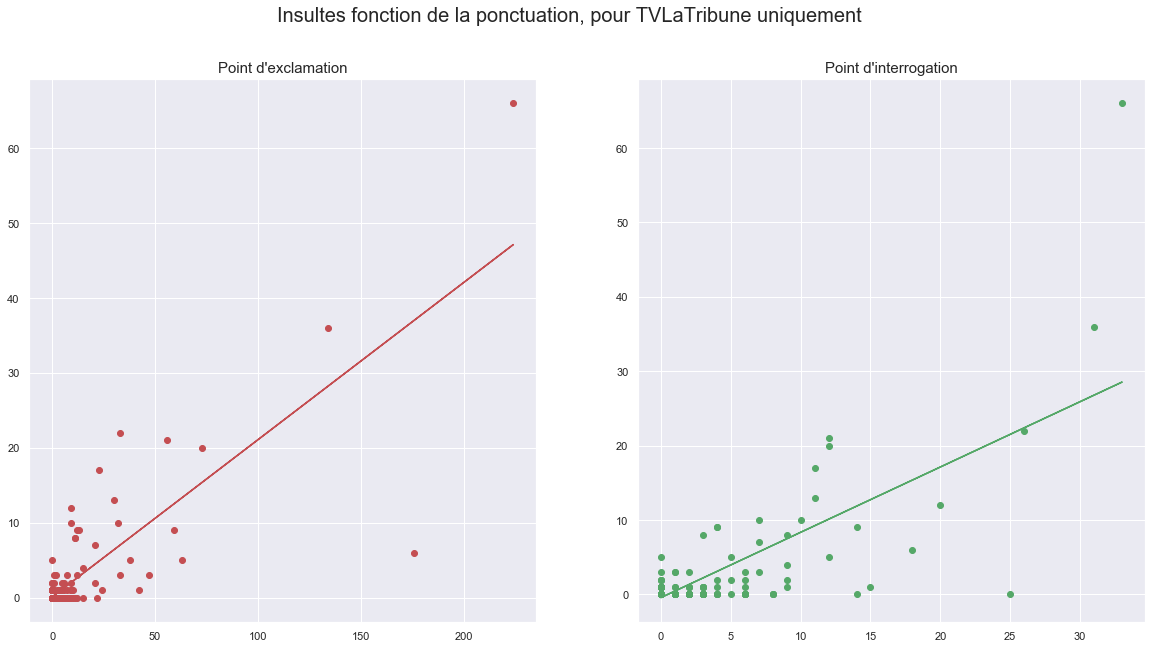

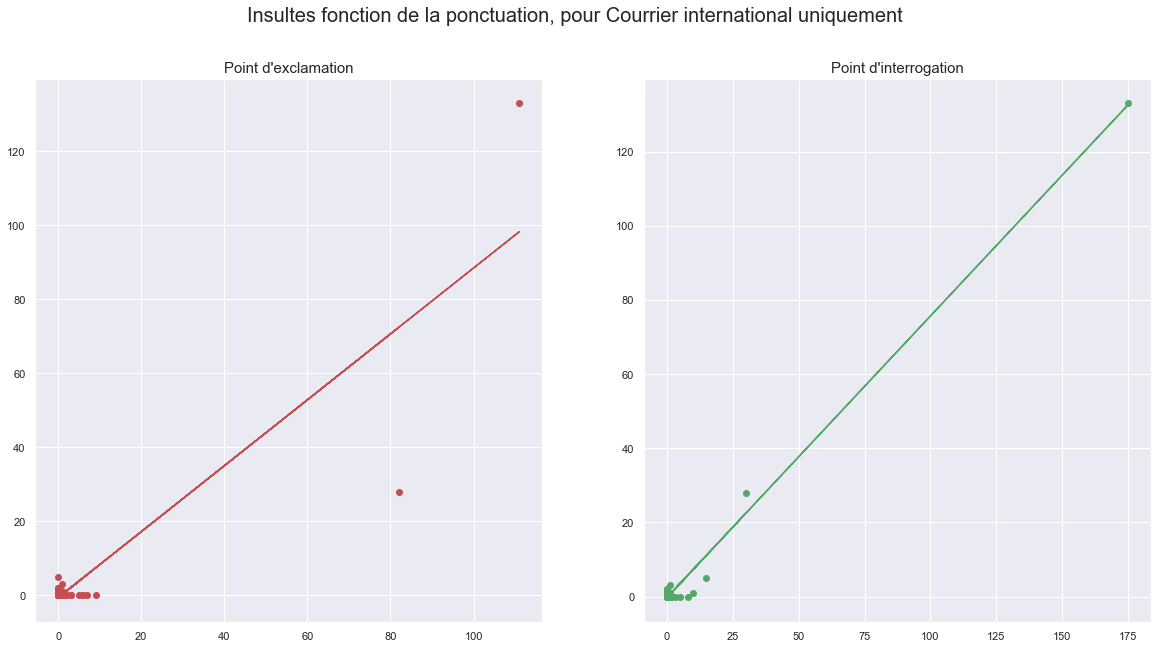

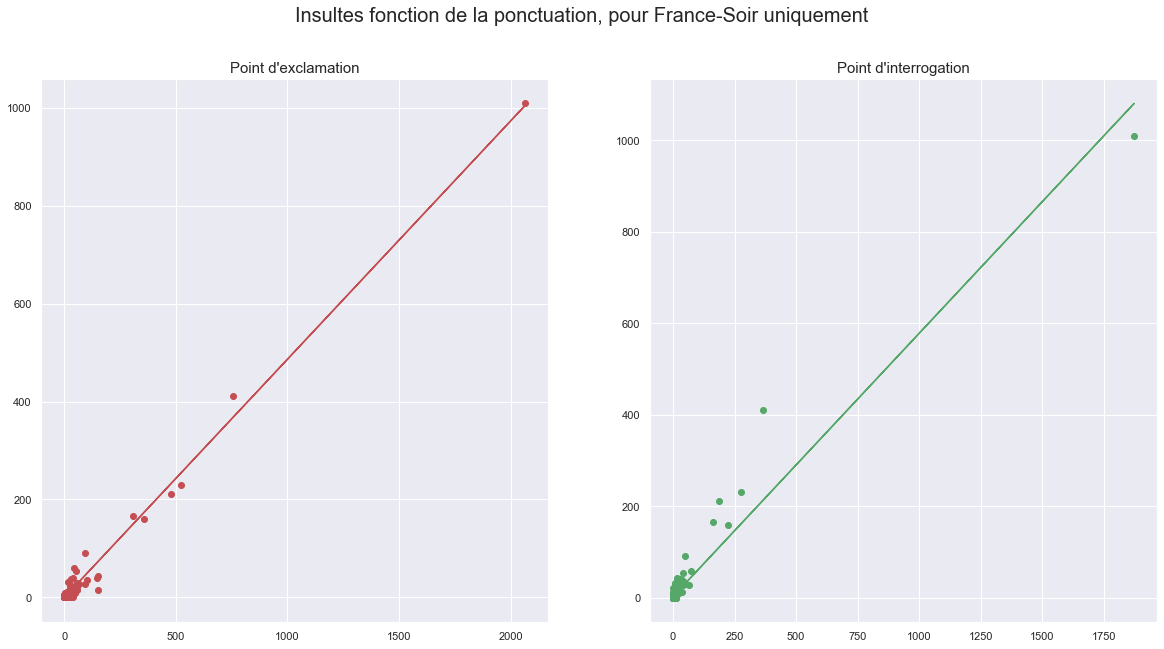

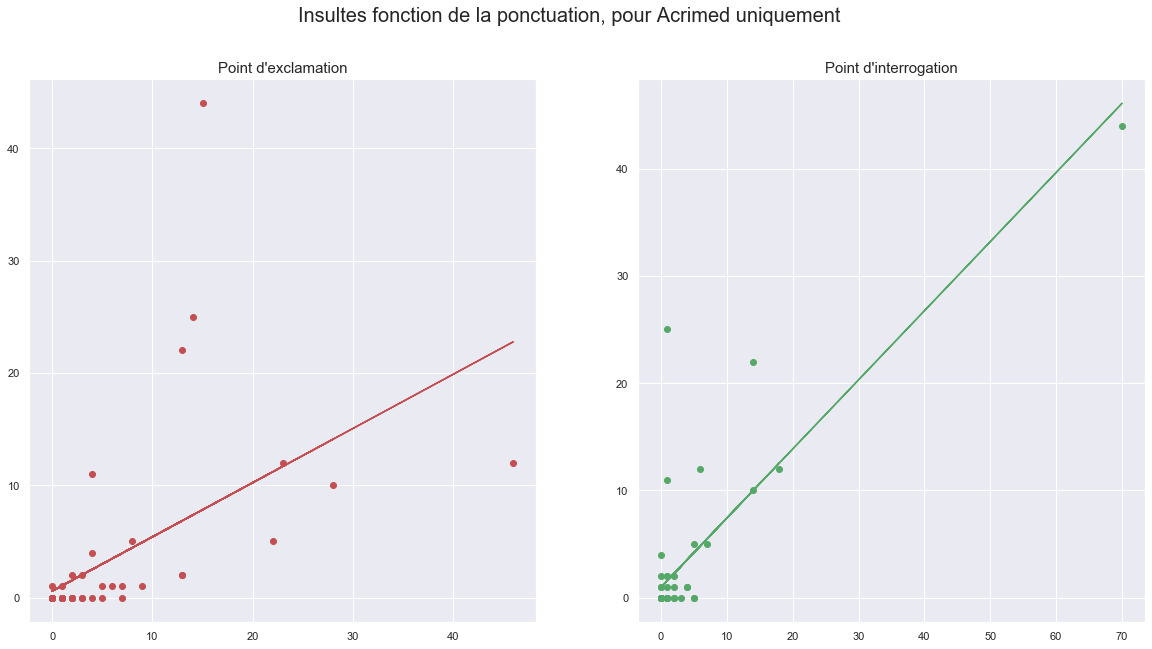

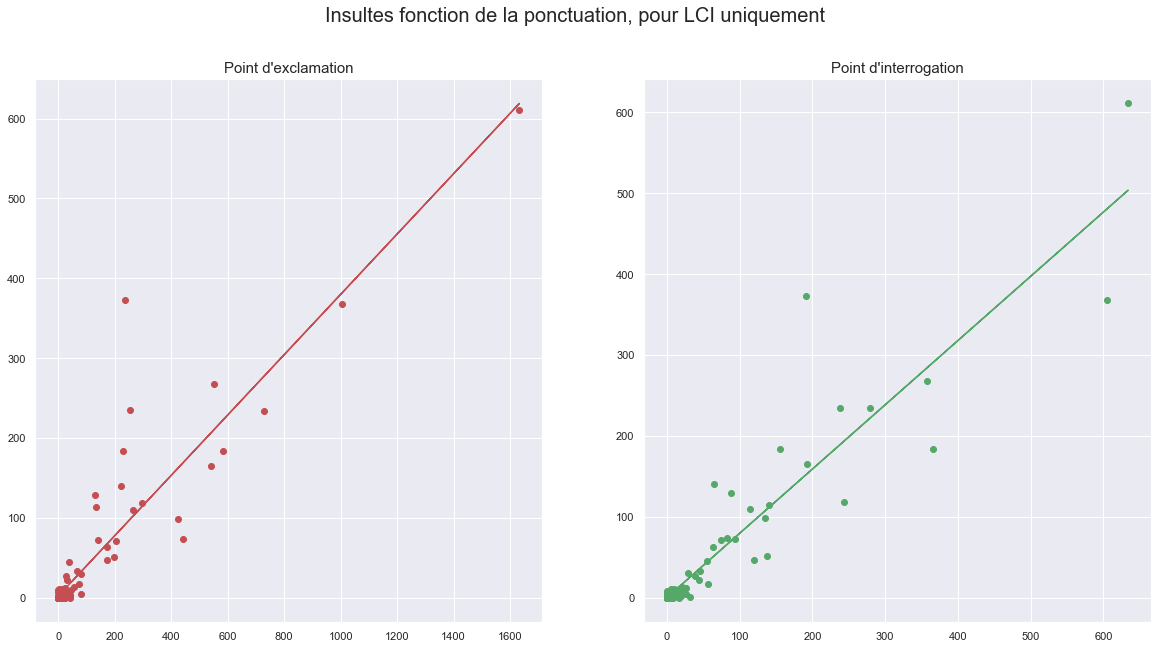

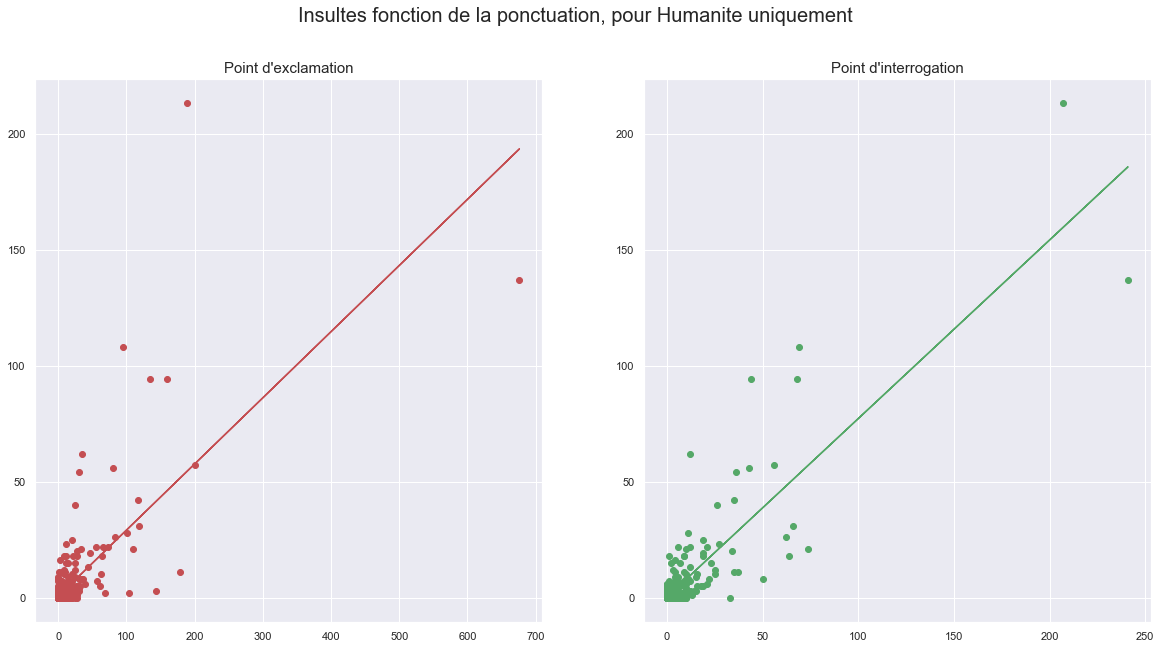

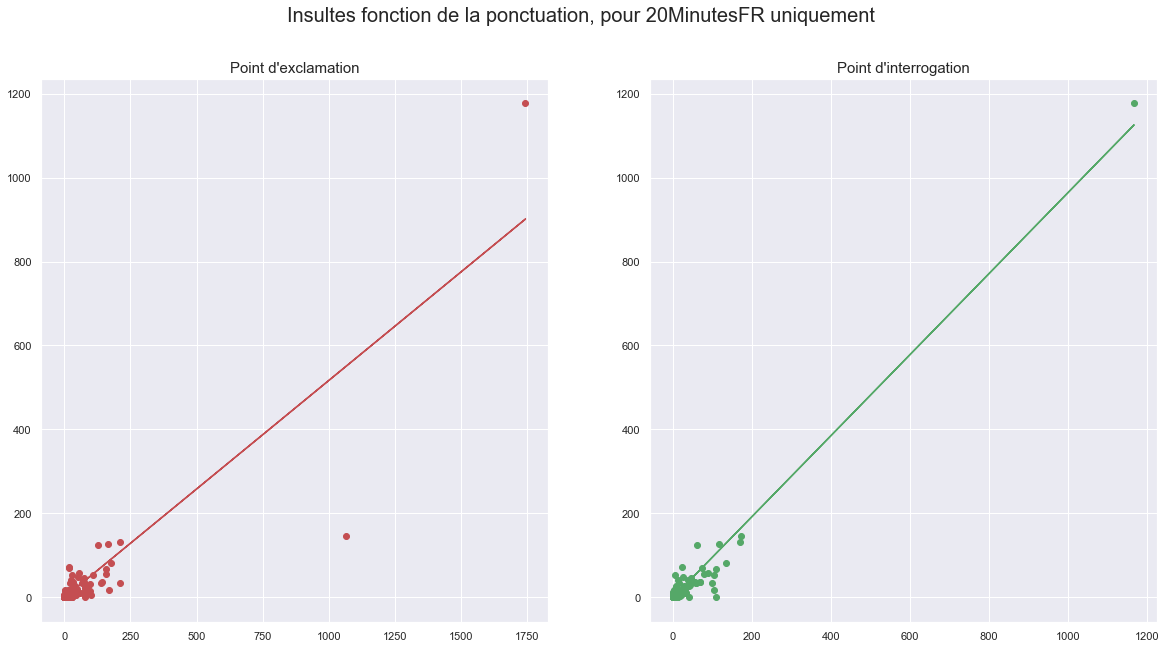

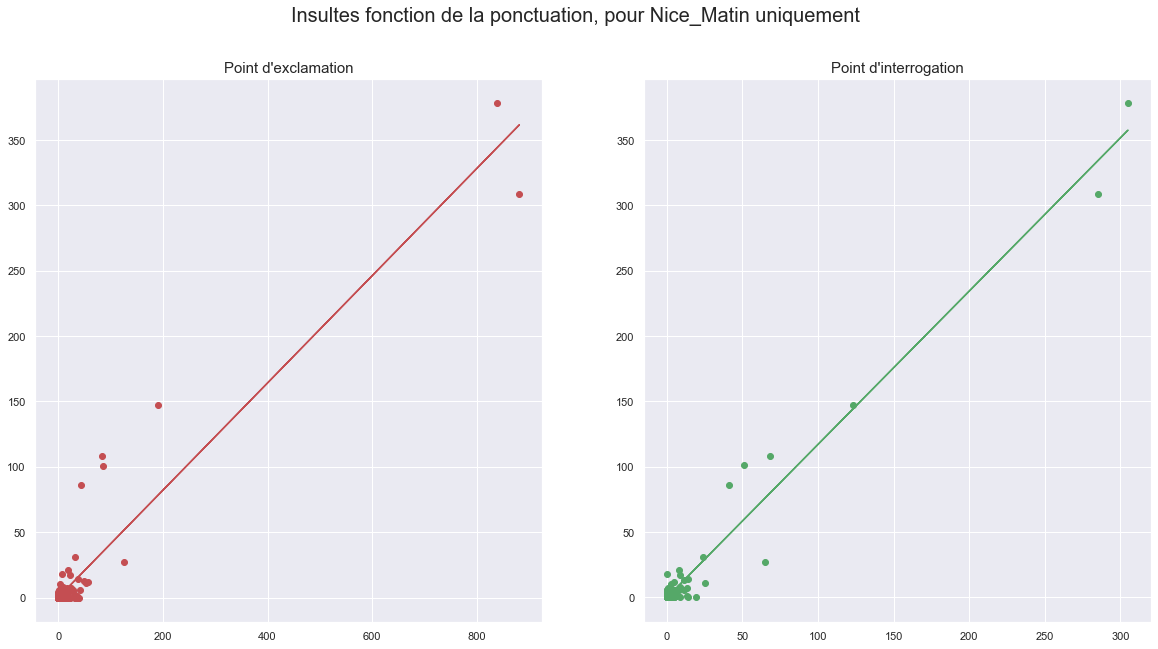

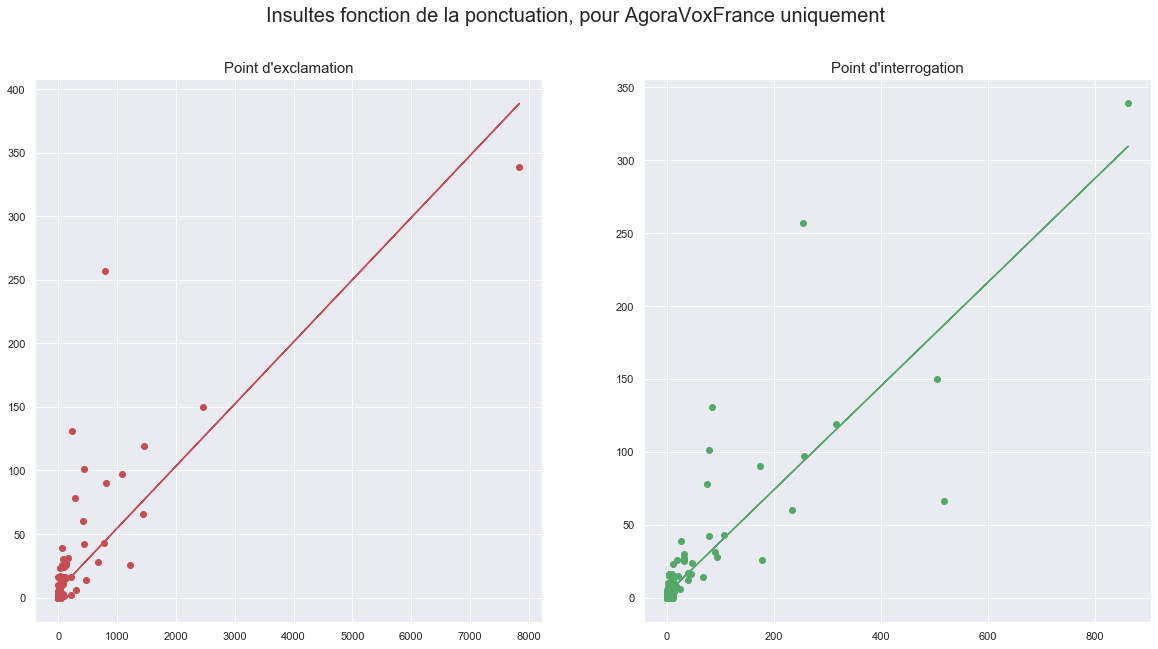

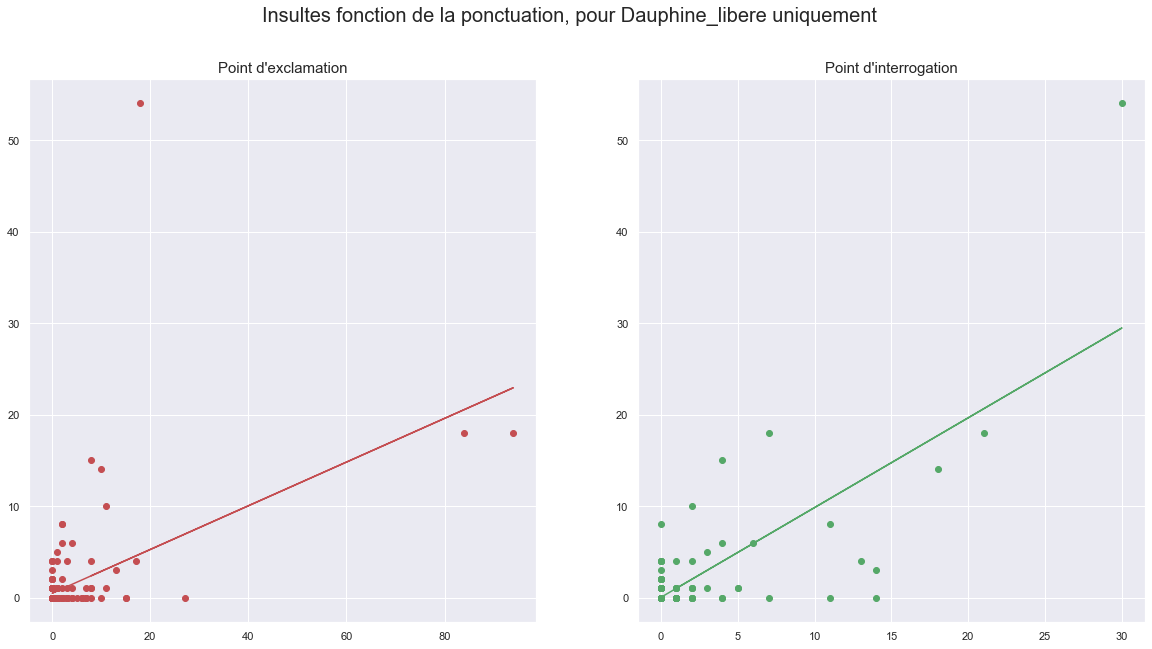

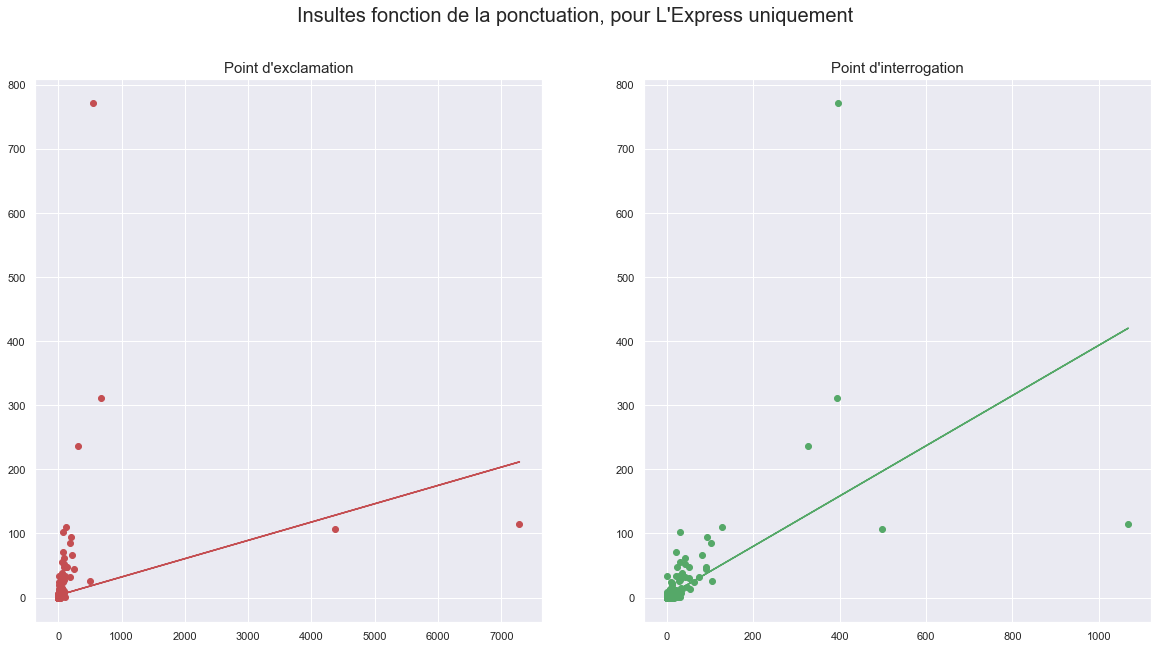

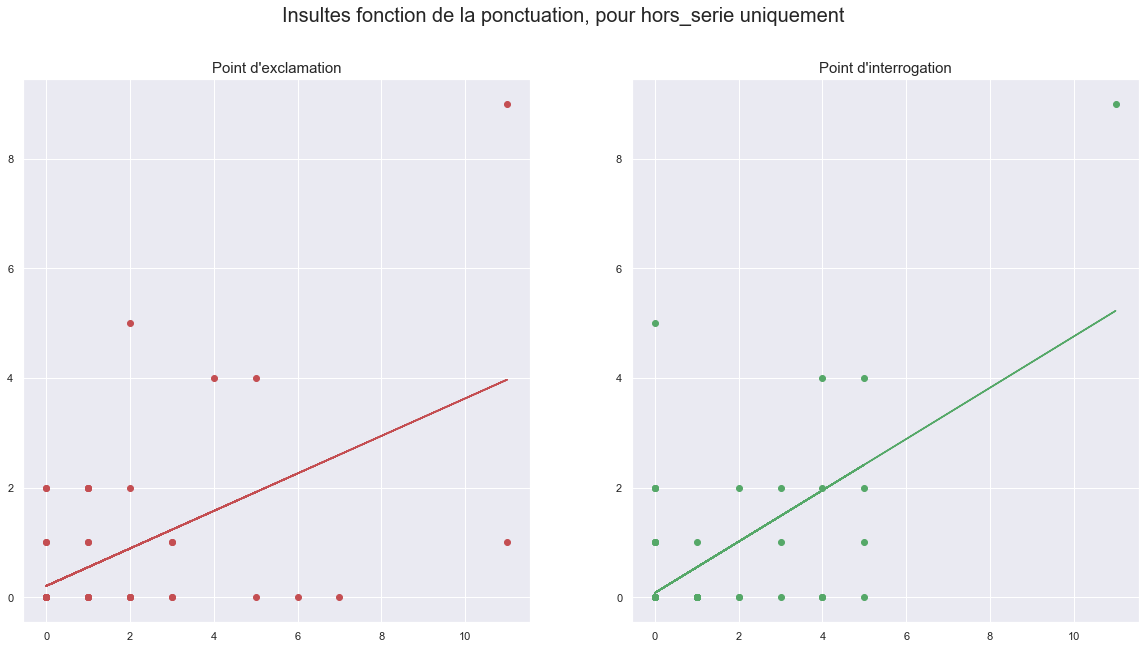

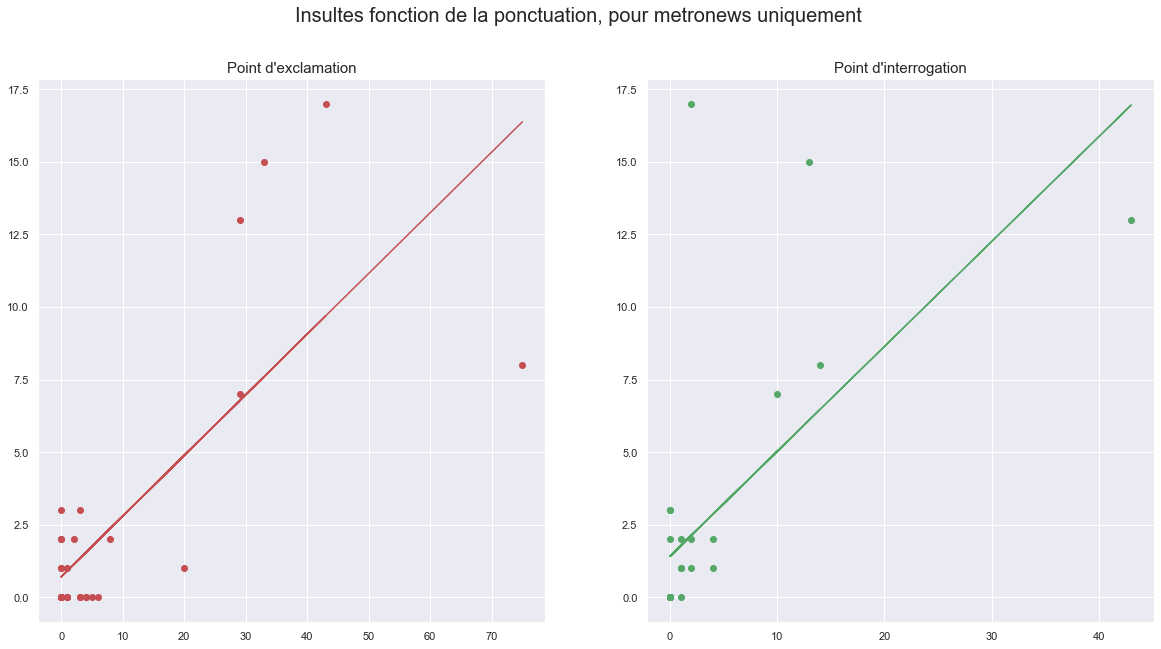

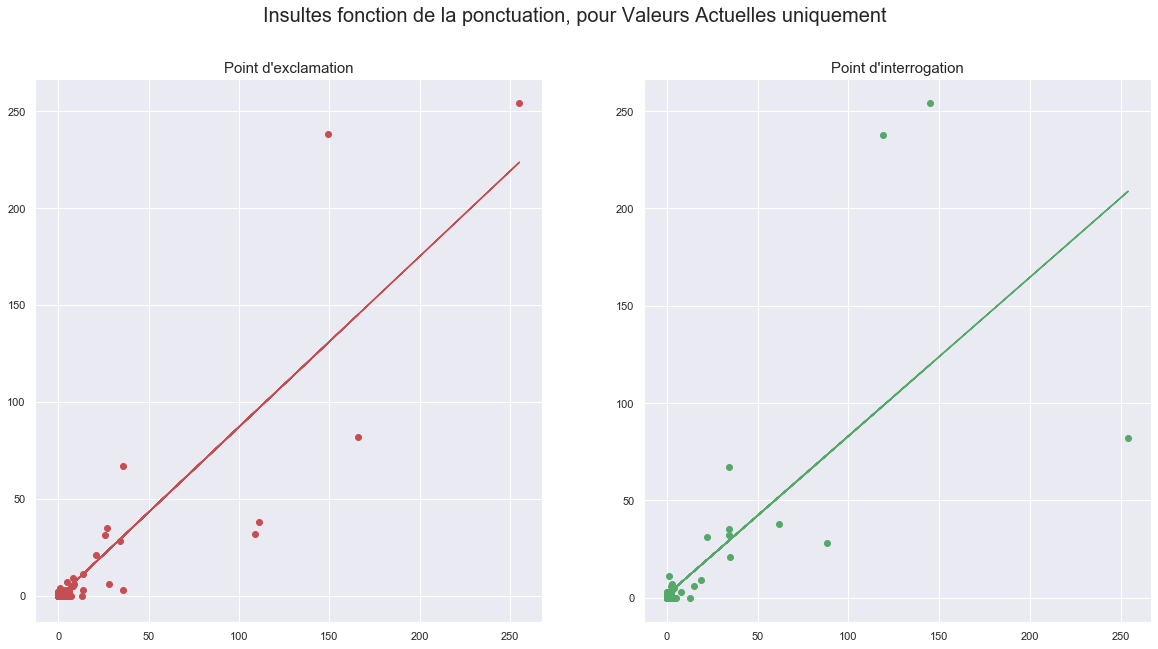

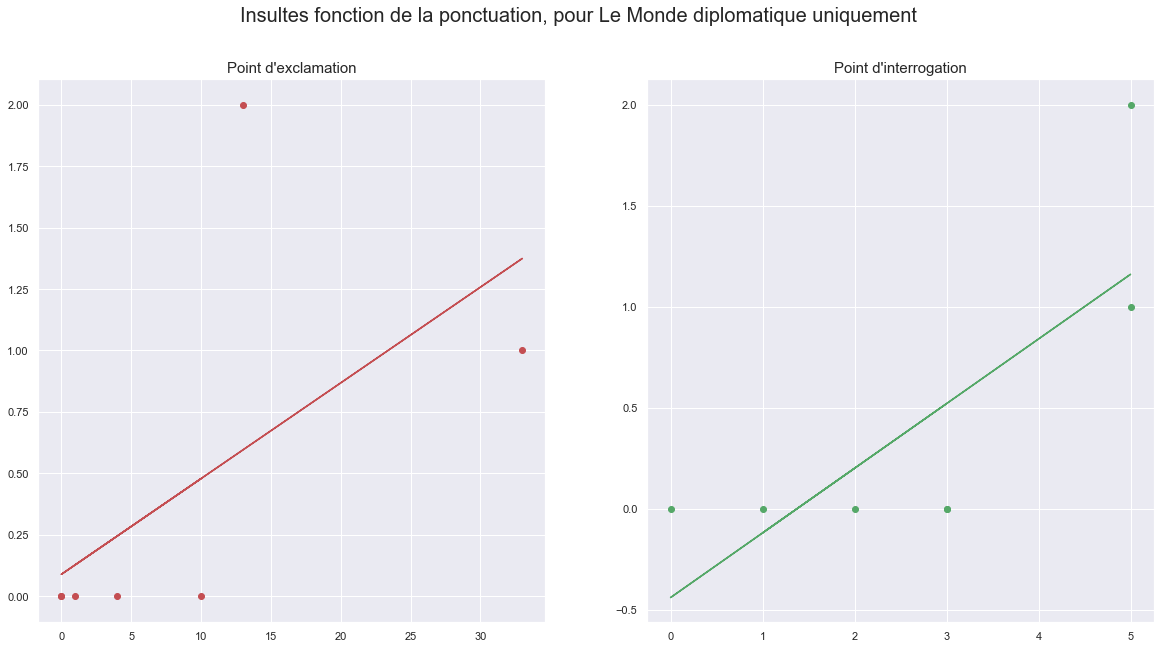

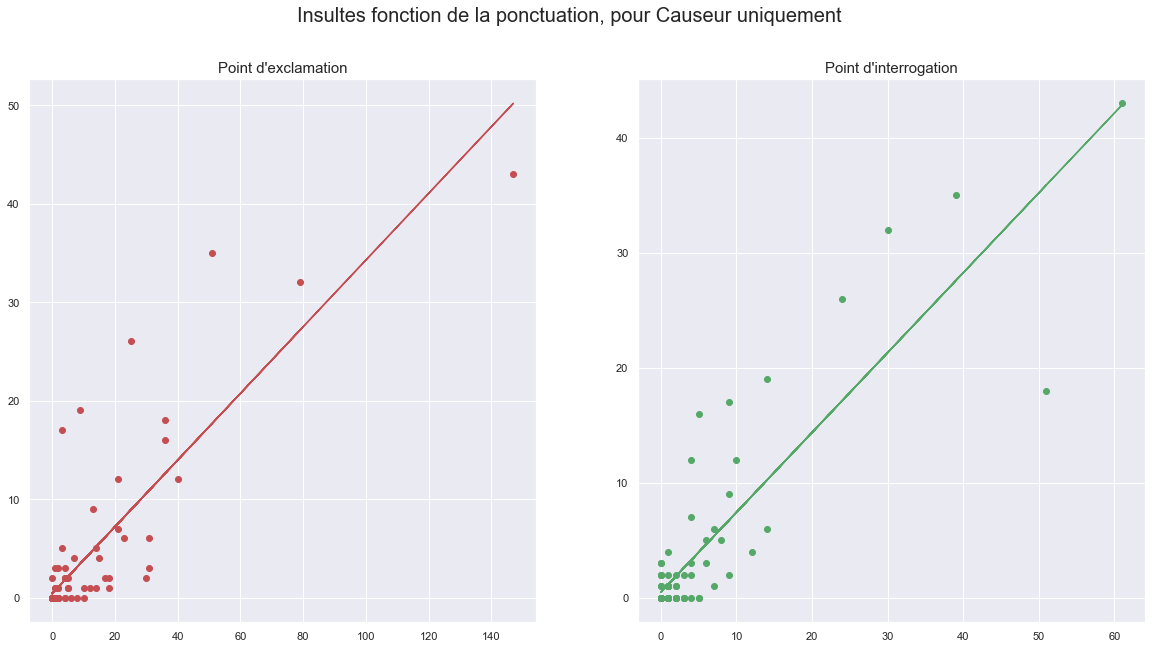

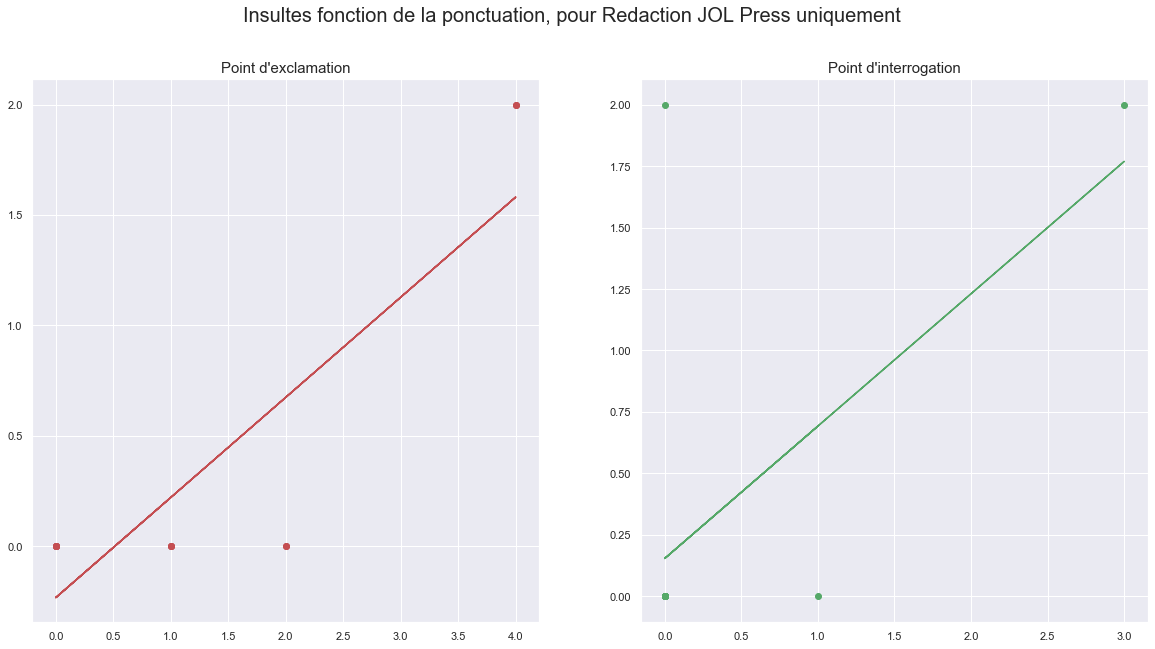

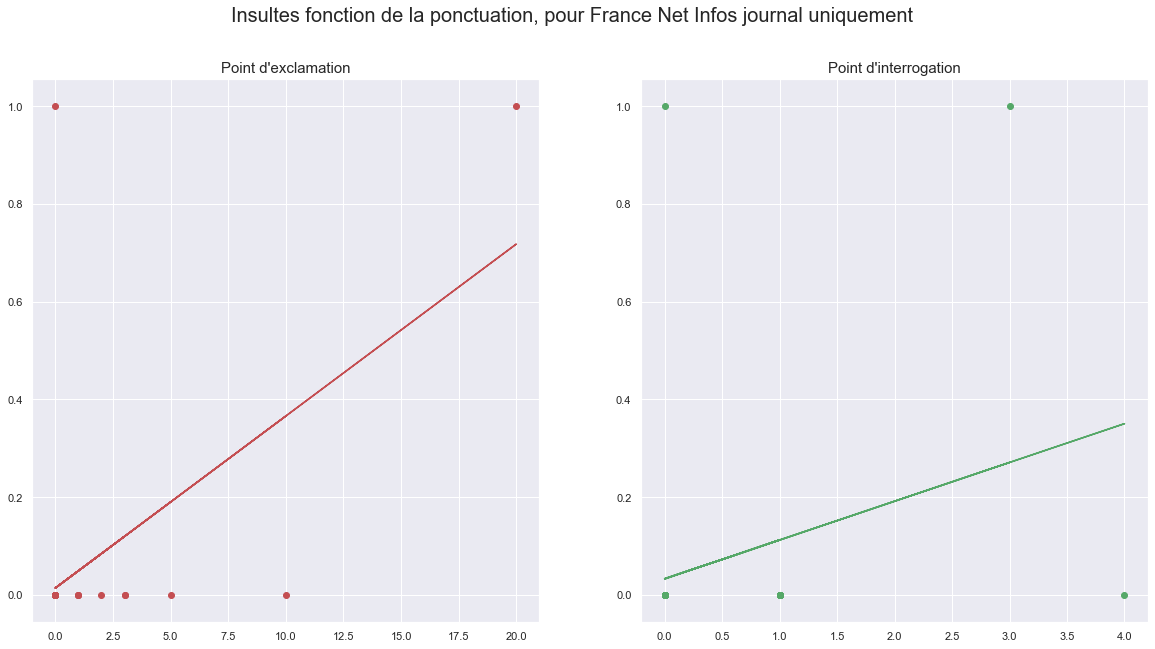

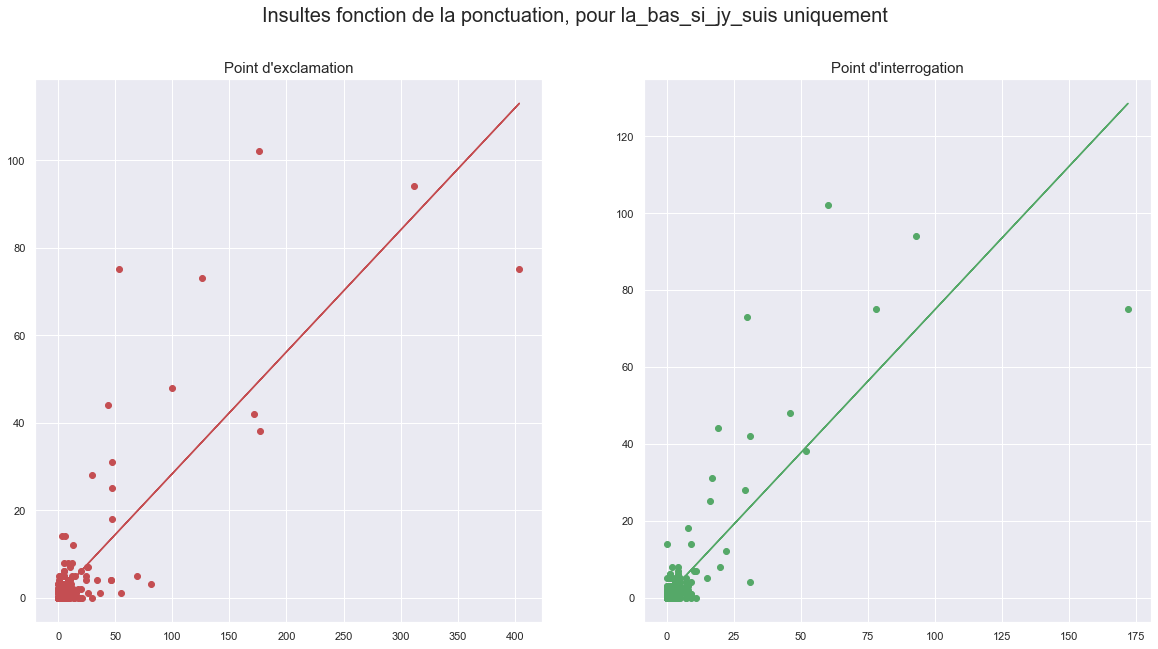

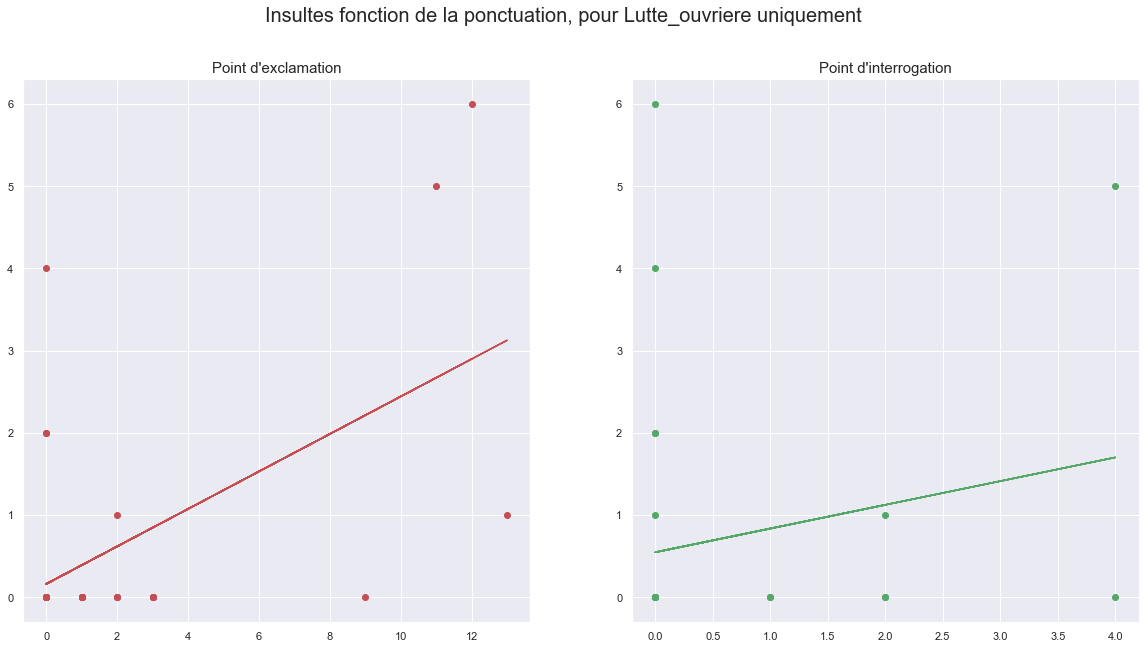

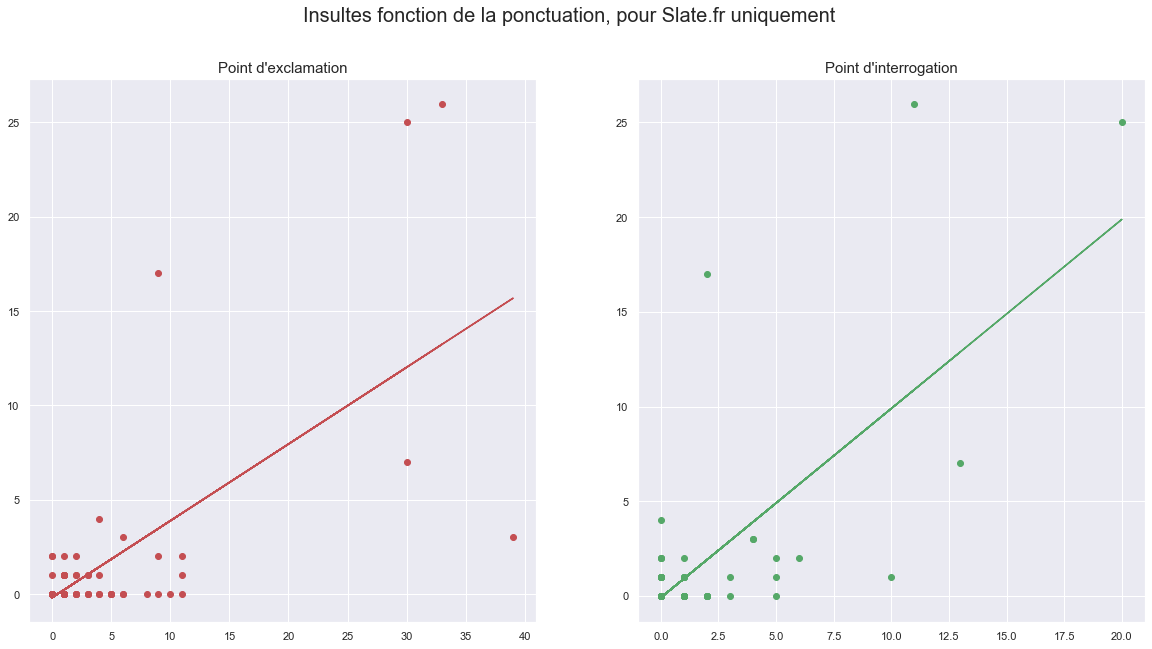

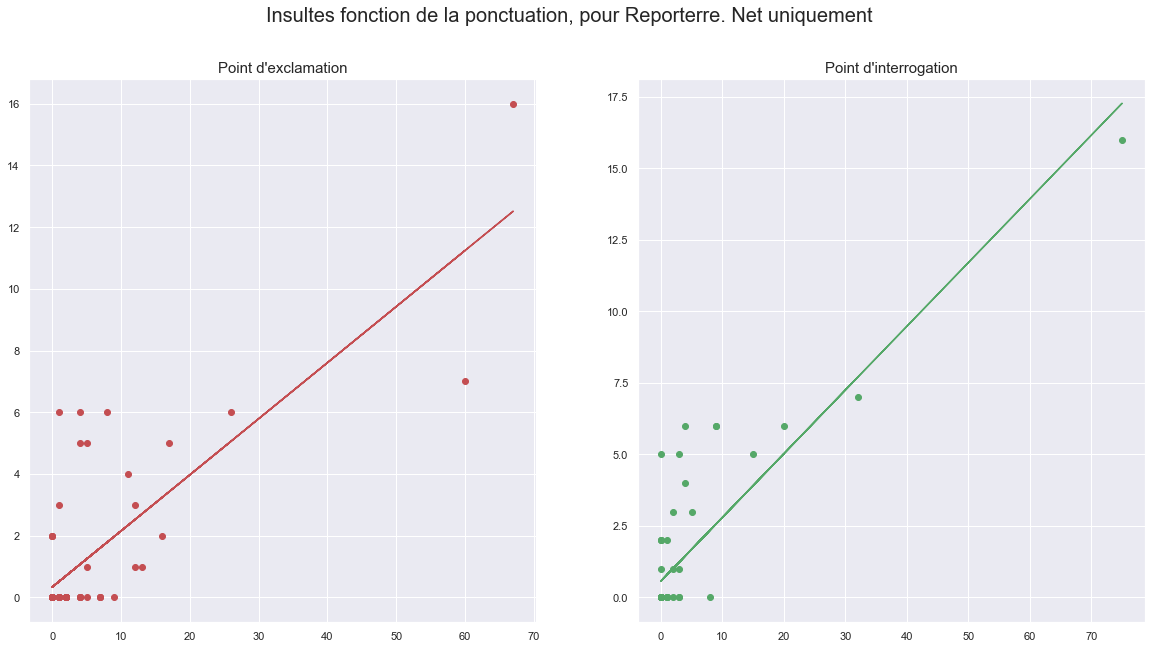

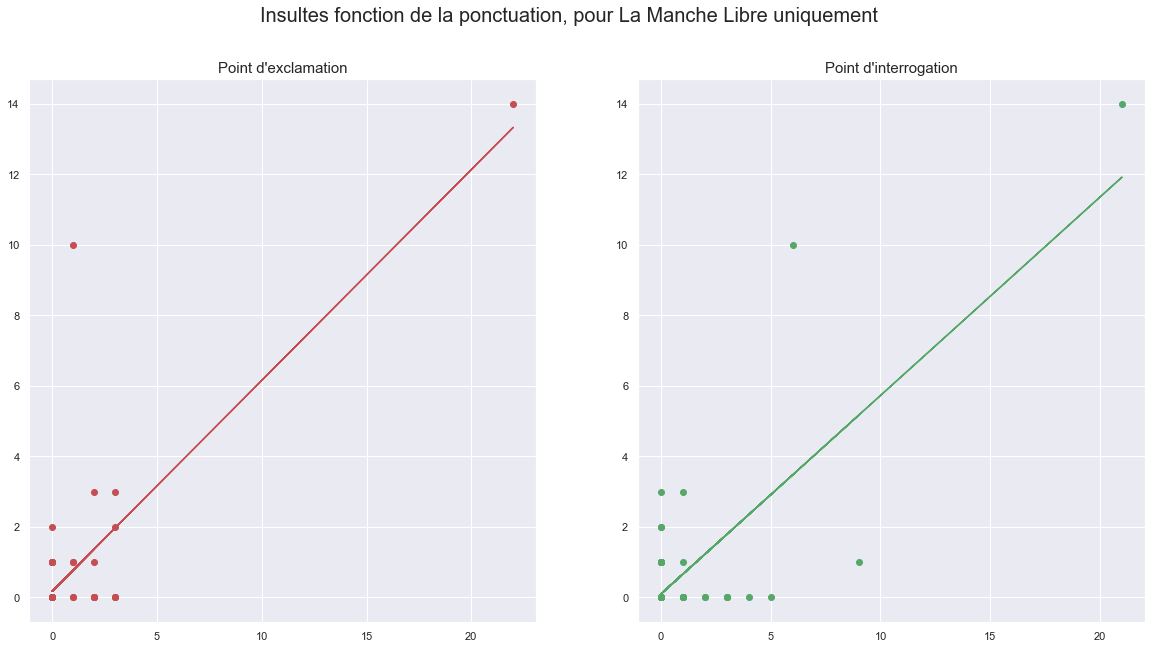

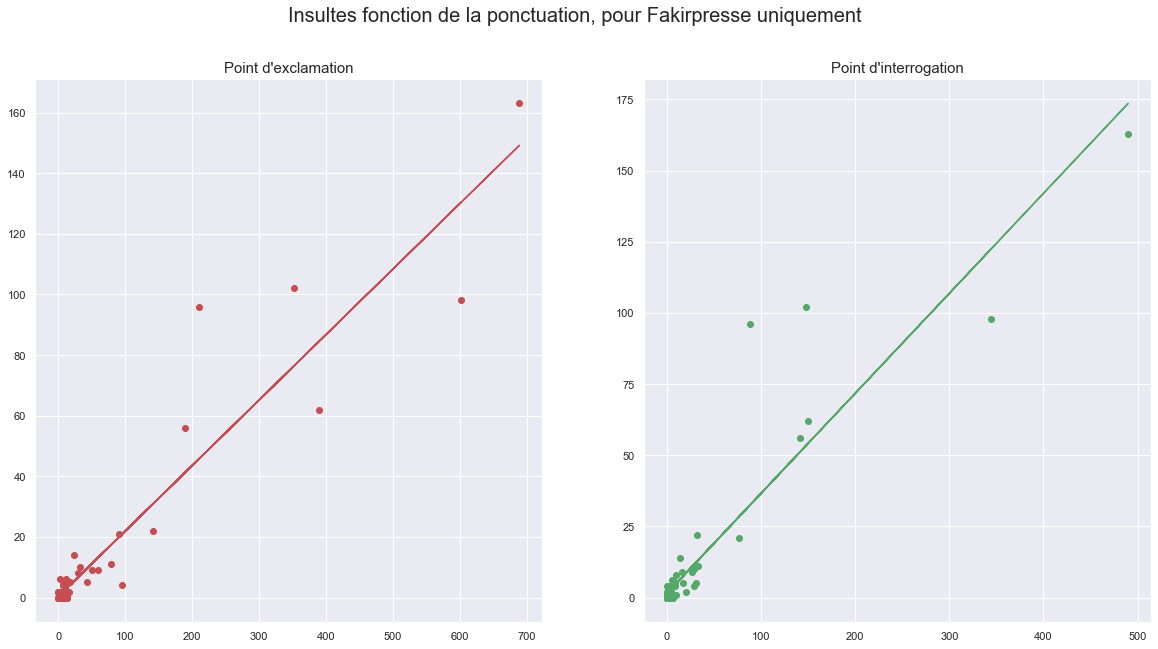

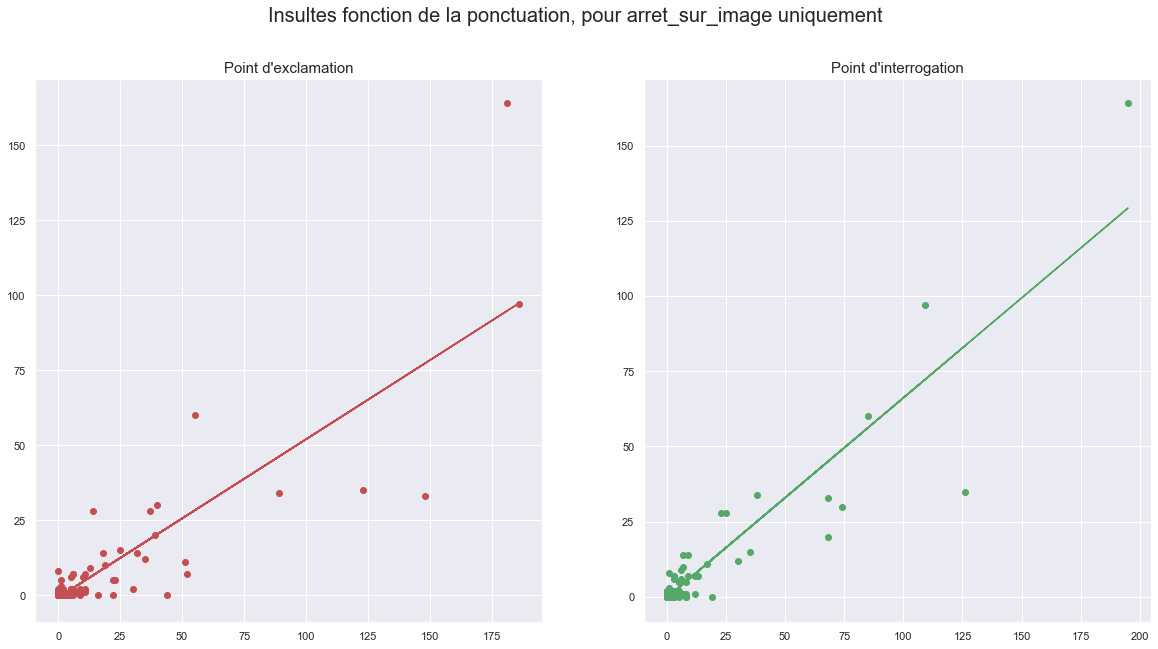

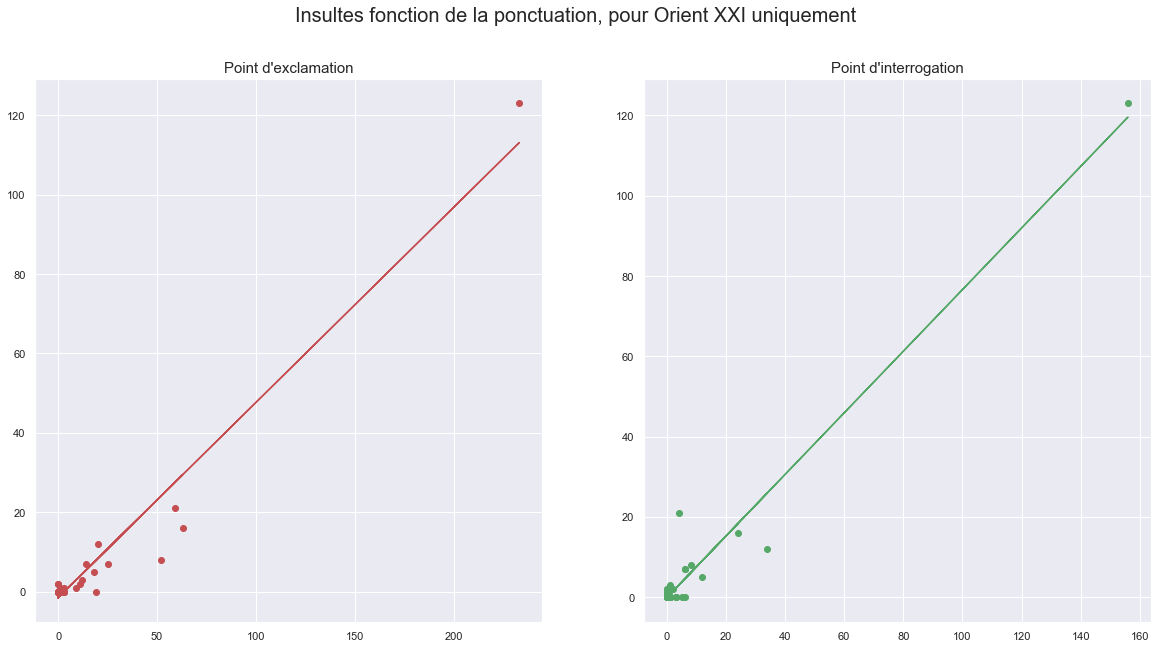

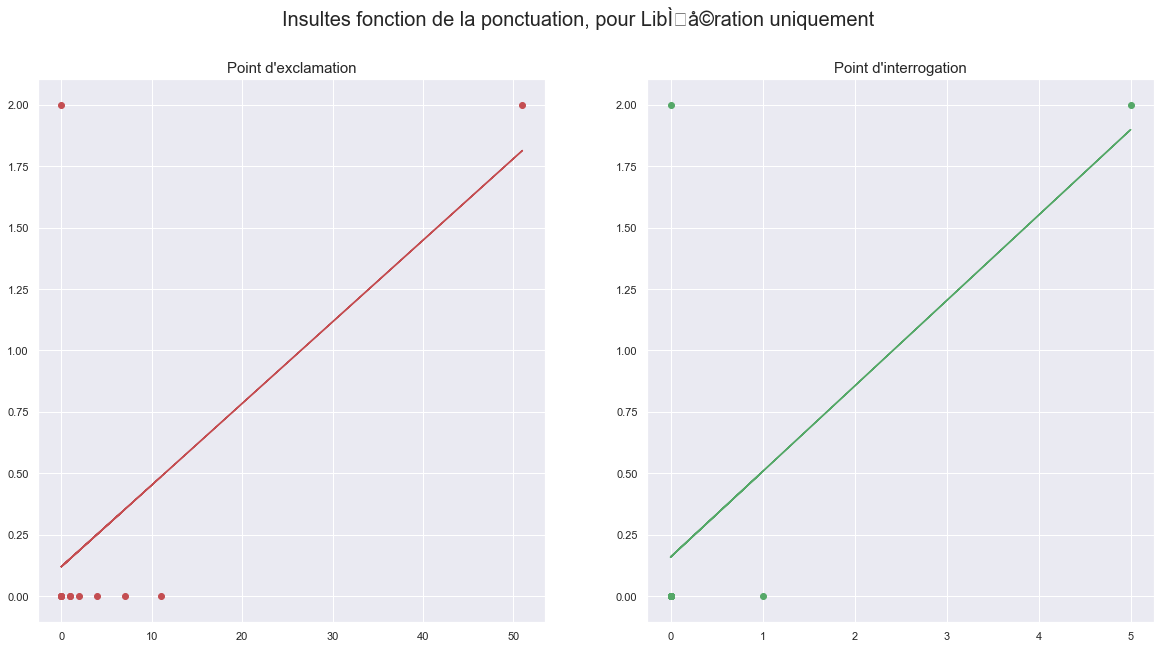

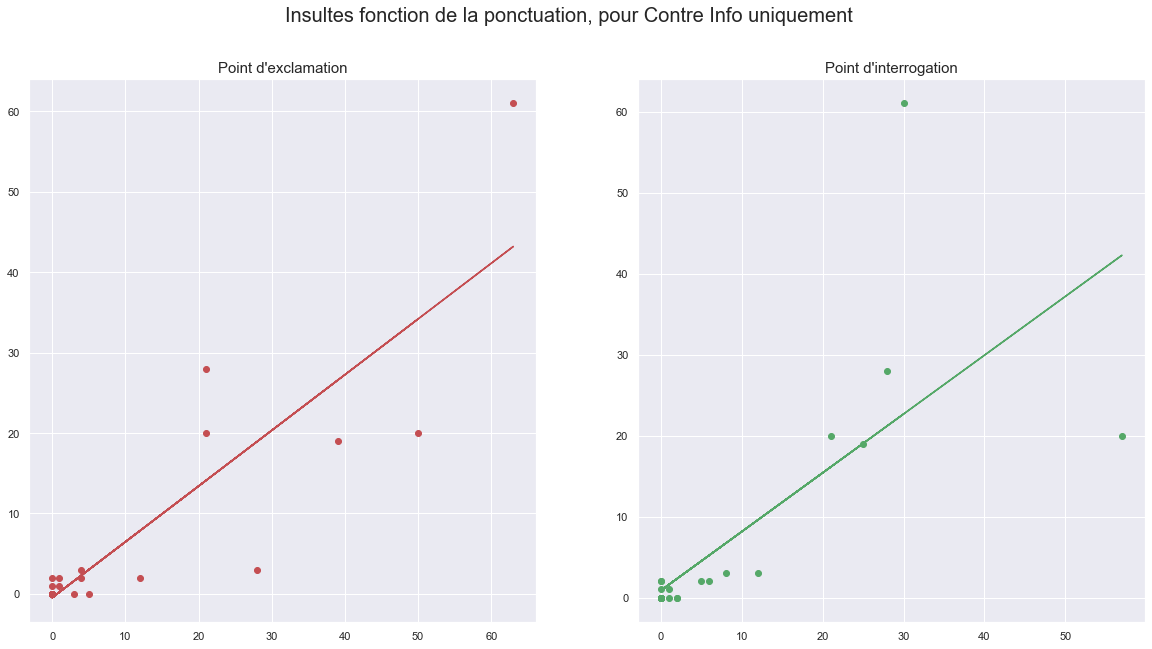

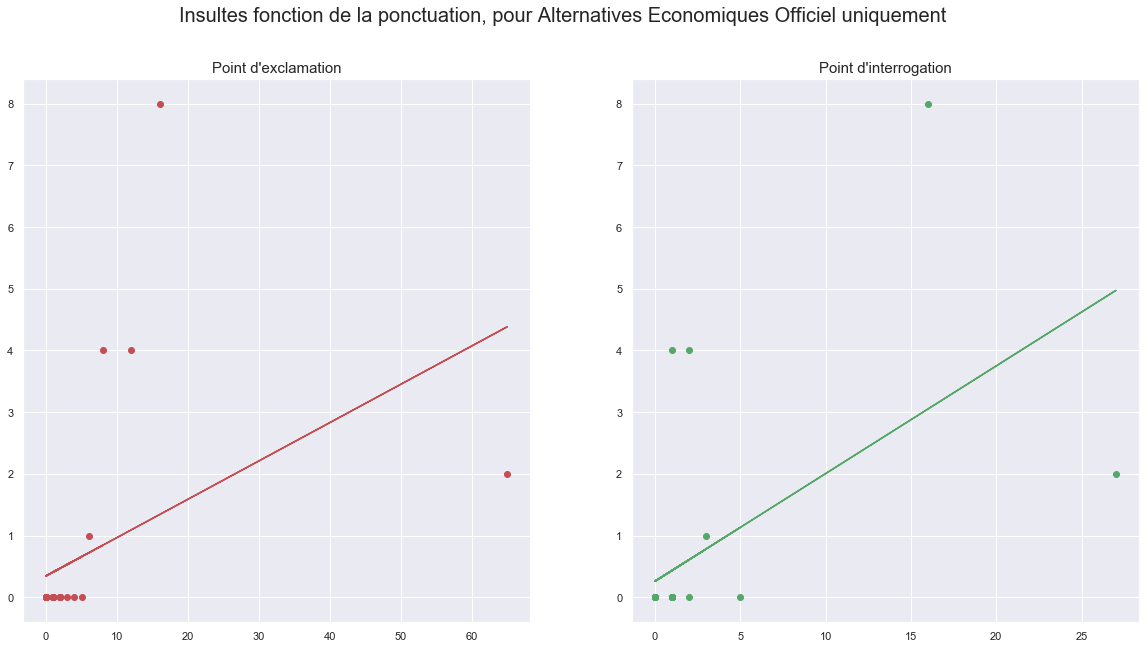

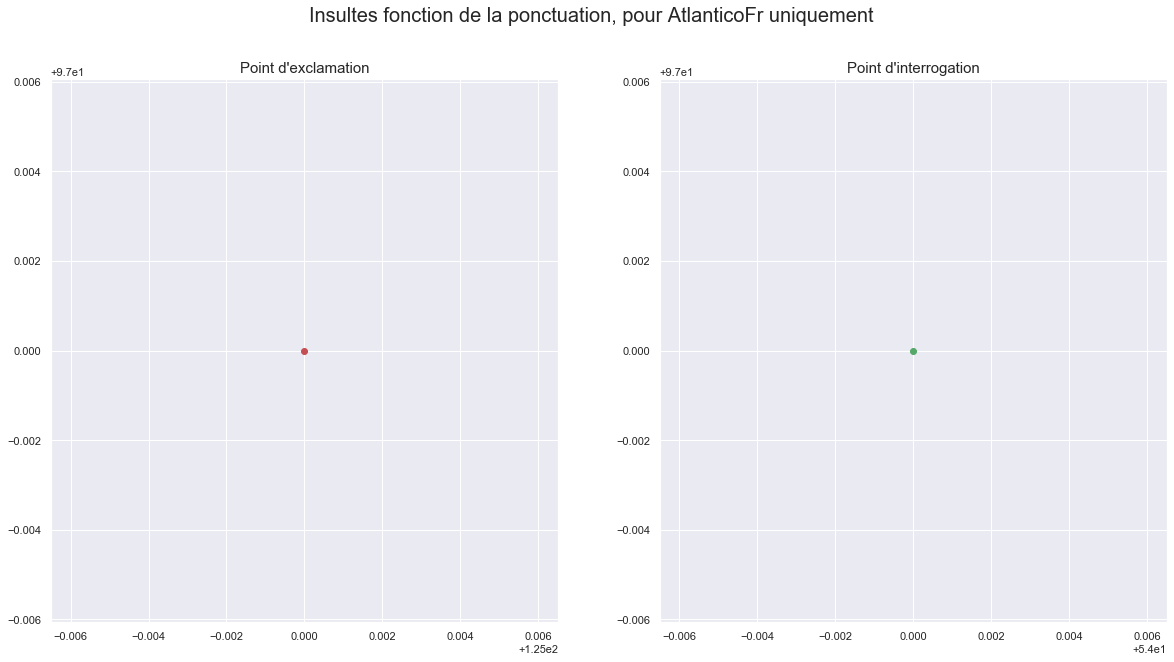

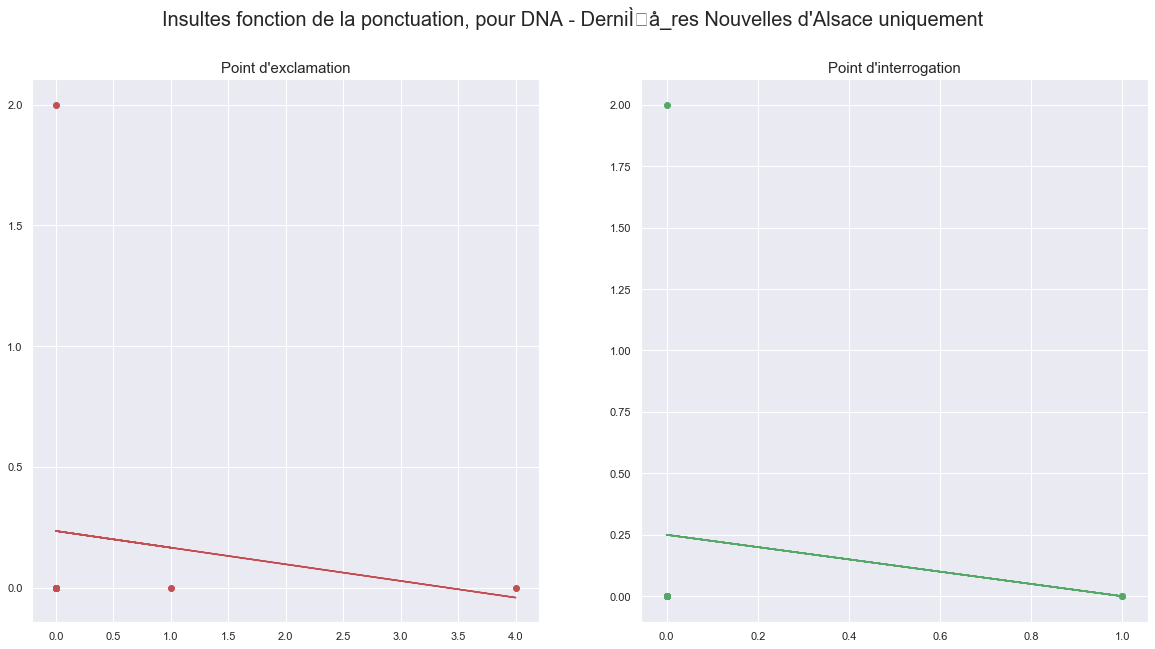

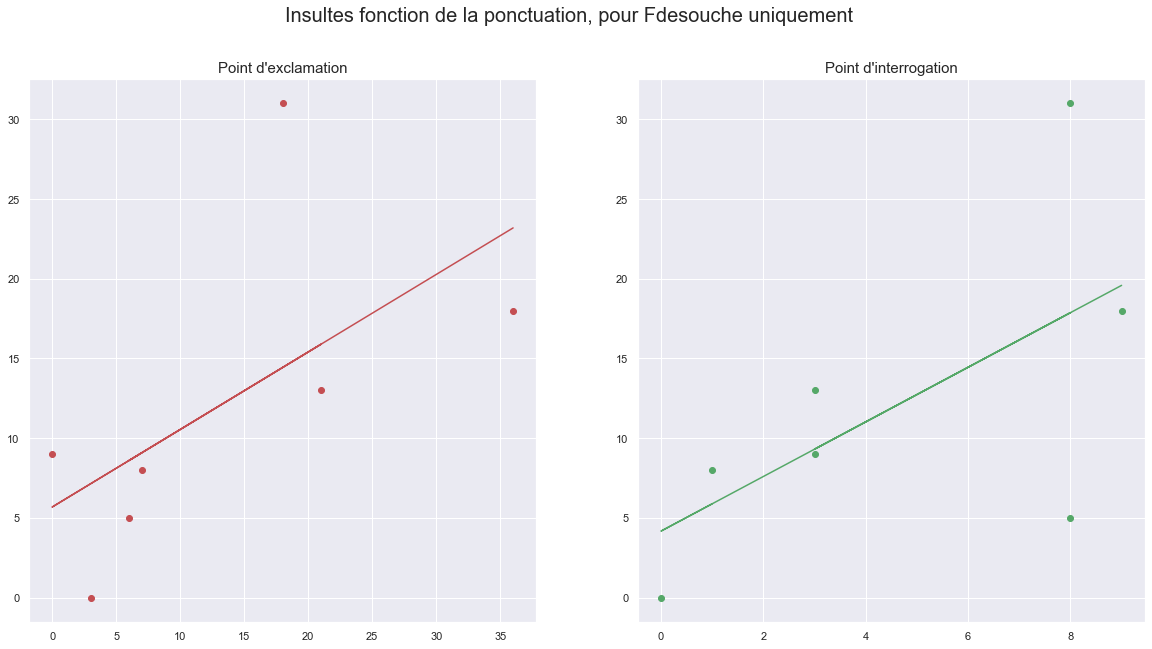

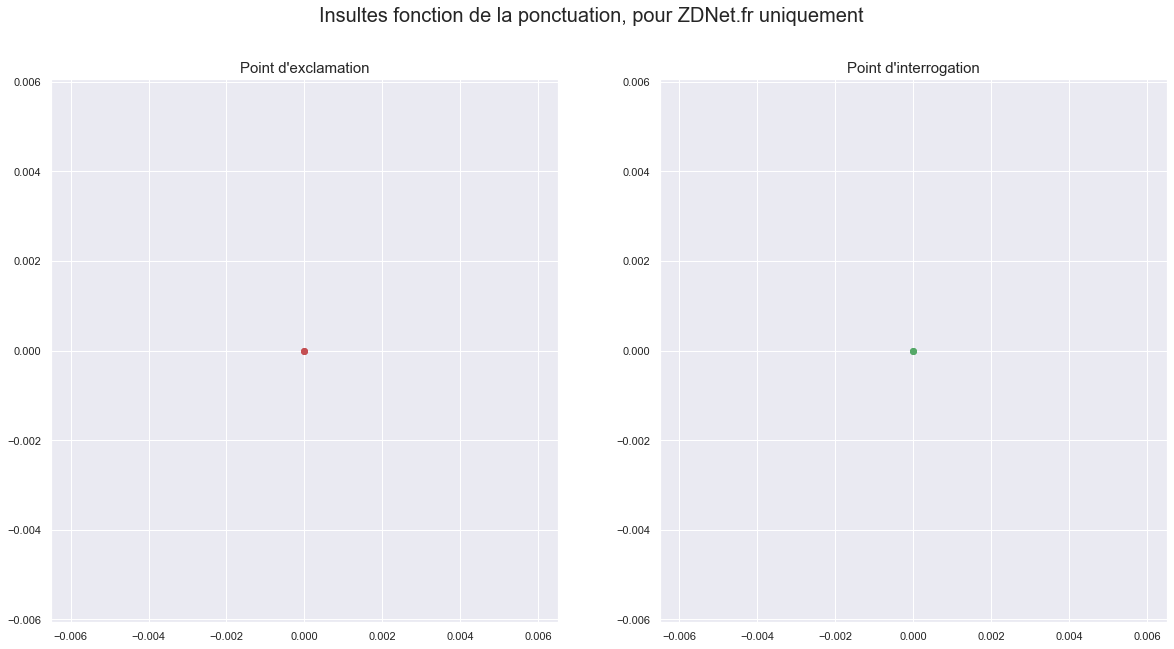

In [193]:
# Tracé du nombre d'insultes en fonction de la ponctuation
# En laissant toutes les chaînes on se rend peu compte de la relation entre les deux. 
# On trace alors pour toutes les chaînes, séparément.

for name in yt.channel_name.unique() :
    slope_excl, intercept_excl, r_value_e, p_value_e, std_err_e = linregress(yt[yt['channel_name'] == name]['nbrExclMark'],
                                                          yt[yt['channel_name'] == name]['nbrMotInsulte'])
    fitLine_excl = slope_excl * yt[yt['channel_name'] == name]['nbrExclMark'] + intercept_excl
    slope_quest, intercept_quest, r_value_q, p_value_q, std_err_q = linregress(yt[yt['channel_name'] == name]['nbrQuestMark'],
                                                          yt[yt['channel_name'] == name]['nbrMotInsulte'])
    fitLine_quest = slope_quest * yt[yt['channel_name'] == name]['nbrQuestMark'] + intercept_quest
    fig, ax = plt.subplots(1, 2, figsize=(20, 10))
    fig.suptitle(f'Insultes fonction de la ponctuation, pour {name} uniquement', fontsize=20)
    ax[0].scatter(yt[yt['channel_name'] == name]['nbrExclMark'], yt[yt['channel_name'] == name]['nbrMotInsulte'], color='r')
    ax[0].plot(yt[yt['channel_name'] == name]['nbrExclMark'], fitLine_excl, color='r')
    ax[0].set_title("Point d'exclamation", fontsize=15)
    ax[1].scatter(yt[yt['channel_name'] == name]['nbrQuestMark'], yt[yt['channel_name'] == name]['nbrMotInsulte'], color='g')
    ax[1].plot(yt[yt['channel_name'] == name]['nbrQuestMark'], fitLine_quest, color='g')
    ax[1].set_title("Point d'interrogation", fontsize=15)

Pas sûr de pouvoir tirer quoi que ce soit des graphiques ci-dessus... Il y a trop de valeur entassées autour de l'origine pour réellement déceler une regréssion pertinente.

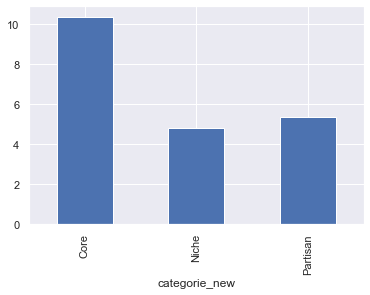

In [160]:
# Proportion sum(insultes) / count(video) par categorie_new

prop = yt[['nbrMotInsulte', 'categorie_new']].groupby('categorie_new').sum()
prop['nbr_video'] = yt.groupby('categorie_new').video_id.count()
prop['Proportion'] = prop['nbrMotInsulte']/prop['nbr_video']
prop['Proportion'].plot(kind='bar')

Les vidéos de type 'Core' ont le taux d'insultes par vidéo le plus élevé. On peut penser que la 'catégorie_new' aura un certain poids dans l'élaboration de l'indice de toxicité.